<h1><center><span style="color:#C2571A"> Prediction of BMW used cars price </span></center></h1>

<h3><center> April 30, 2021 </center></h3>

<h2>Table of Contents </h2>
    
1. [Project Motivation](#1)
2. [The Dataset](#2)
3. [Machine learning algorithms](#3)
4. [Performance Metrics](#4)
5. [Analysis Plan](#5)
6. [Project implementation with accordance to the Analysis plan](#6)
    - [Step 1. Read the dataset, conduct exploratory data analysis and clean the data](#6.1)
    - [Step 2. Explore the data to discover any initial insights and perform transformations and/or feature engineering](#6.2)
    - [Step 3. Preprocess data for modeling](#6.3)
    - [Step 4. Cluster analysis](#6.4)
    - [Step 5. Test LinearRegression algorithm](#6.5)
    - [Step 6. Test other regression algorithms](#6.6)
    - [Step 7. Tune model based on CatBoostRegression algorithm](#6.7)
    - [Step 8. Deep Learning. Predicting price using Keras](#6.8)
    - [Step 9. Implement BMW used cars predictor using CatBoostRegressor algorithm](#6.9)
7. [Conclusion and Recommendations](#7)
8. [References](#8)

# 1. Project Motivation <a name="1"></a>

What determines the price of used cars?

The value of a car drops right from the moment it is bought and the depreciation increases with each passing year. In fact, only in the first year, the value of a car can decreases from 10 to 60 percent (Ref. 1). 

Different factors affect the value of a vehicle such as the mileage, model, fuel type, the condition, location, color of a car, etc.

The goals of this projects are:
- to explore what factors affect a sale price of used BMW cars and which characteristics are the most important to determine a value of a car,
- build a prototype of model which predicts price of used BMW cars.

The results of this project may be useful for businesses that work with reselling of used BWM cars and buyers who are looking to purchase a pre-owned BMW car. **Understanding the factors that determine the price and which of them have the biggest affect can help to improve the process of cars valuation.** On the one hand it can help to ensure the data with all important parameters is collected. On the other hand, it can help to save efforts on the initial steps of valuation, as only the most important car parameters can be collected to make a rough estimation of a car price or to assess how good is a particular deal of a car sale. 

**The developed sale price predictor can be of help during the process of cars search and valuation as it can be used as a tool that provides a quick rough estimation of a car price based on the given input parameters.**

# 2. The Dataset <a name="2"></a>

The dataset that was chosen for the analysis contains information about BMW Used Car Sales and was obtained from DataCamp GitHub repository for careerhub data (Ref. 2).

In the repository description or in the data itself there is no information about the source of this dataset, but there was a reference about the `tax` column as information about the road tax. Based on this an assumption was made that the data was collected in the United Kingdom.

This is related to the fact that miles per gallon parameter is commonly used only in three big countries: the United States, the United Kingdom and Canada. In the United States and Canada there is no road tax as such, but in the United Kingdom there is a road tax. 

From briefly checking the values of `tax` column I made a conclusion that they seem to make sense, for example:
-	the BMW i3 model doesn't produce any CO2 at all, so it is exempted from road tax, so tax value of 0 is correct.
-	quick search for current road tax for the M4 model of BMW car showed possible values from £315 to £490, so value of 300 in 94th observation seem to be close enough considering tax rate could have changed since data was collected and tax can vary depending on specific car characteristics.
-	current annual flat rate of road tax is £155, which is also in a range of `tax` values from our dataset. 

## 2.1. Context of the dataset

The statistics from The Society of Motor Manufacturers and Traders (SMMT) show that in 2020 used car sales in UK decreased by 14.9% with the 6,753 thousands transactions made during the year:
- Q1. Solid growth in January and February was wiped out by steep -30.7% decline in March as showrooms closed  as coronavirus hits. Market for used plug-in electric vehicles stays strong with demand rising 13.6% in first quarter (Ref. 3).
- Q2. UK used car market plunges -48.9% in second quarter to just over 1 million transactions as coronavirus lockdown impacts the market. Pace of decline gradually eases throughout the quarter as dealers re-open in line with government rules and private market gets back on the move (Ref. 4).
- Q3. Growth recorded in each month of the quarter, with September plate-change driving highest increase of 6.3%. Demand lifts across all fuel types, with biggest percentage growth enjoyed by electric vehicles after disappointing second quarter (Ref. 5).
- Q4. Weak end to year with Q4 transactions down -6.2% to round off a turbulent 2020 for the UK used car market. Alternatively fuelled vehicle used transactions rise 5.2% to 144,225 taking 2.1% market share (Ref. 6).

Also these statistics show that in each quarter of 2020 the most popular BMW car was 3 Series model, which took 6th place by the number of transactions among all car models. 

In Statista data platform I was able to find that the BMW share in new cars market sales in UK was fluctuating from 5% to 9% during 2015-2020 (Ref. 7). In 2020 there were 115.5K new BMW passenger cars sold in UK, which is a decline of about 32% year-on-year amid the outbreak of the coronavirus pandemic (Ref. 8) - this is a significantly bigger decline in sales in comparison to used cars market decline.

Another interesting statistic is that as of 2016 the average age of cars on the road in the UK was 7.7 years old (Ref. 9).

## 2.2. Dataset characteristics

The data consists of 10781 observations and 9 columns:
- 3 categorical variables: `model`, `transmission`, `fuelType`;
- 5 numerical variables: `year`, `engineSize`, `mileage`, `tax`, `mpg`;
- continuous target vatable `price`.

# 3. Machine learning algorithms <a name="3"></a>

The task to be solved in this project is supervised regression problem.

Based on what is known at the moment about data characteristics a linear regression and a random forest algorithms may be suitable for this task. During data preparation and exploration we will take into account assumptions about input data that these algorithms have.

Linear regression may be quite powerful algorithm given the input data comply with following assumptions:  
-	linearity: assumes that the relationship between predictors and target variable is linear;
-	no noise: eg. that there are no outliers in the data;
-	no collinearity: if you have highly correlated predictors, it’s most likely your model will overfit;
-	normal distribution: more reliable predictions are made if the predictors and the target variable are normally distributed;
-	scale: it’s a distance-based algorithm, so preditors should be scaled (Ref. 10).

Random Forest algorithm on the other hand is less demanding as for the data preprocessing:
- the data does not need to be rescaled or transformed;
- algorithm is great with high dimensional data since it is working with subsets of data;
- algorithm is robust to outliers and non-linear data;
- problem of overfitting is frequently occur, can be solved with hyperparameters tuning.

The list of algorithms that are planned to be tested:
-	Linear regression;
-	SGDRegressor;
-	ElasticNetCV;
-	KNeighborsRegressor;
-	SVR;
-	DecisionTreeRegressor;
-	RandomForestRegressor;
-	GradientBoostingRegressor;
-	AdaBoostRegressor;
-	XGBRegressor;
-	LGBMRegressor;
-	CatBoostRegressor;
- Deep learning with Keras.

# 4. Performance Metrics  <a name="4"></a> 

The choice of the best metric for regression task depends on specifics of the data and the requirements to the model performance.
For instance, what is more important: to predict price as accurate as possible on average or not to exceed certain threshold of acceptable error in predictions?

Based on what is known about the data at current stage and understanding of expectations from the model performance, it is suggested to use R-Squared/RMSE as the main metrics and MAE/RMSLE as the supporting metrics. This decision is based on the assumption that big errors in price predictions should be avoided, but in the same time accuracy of predictions is also should be measured. 

### *R-Squared*

R-squared (R2) is a statistical measure, known as coefficient of determination, that represents the proportion of the variance for a dependent variable that is explained by an independent variable. R-squared metric determines goodness of fit and is scaled between 0 and 1. The advantage of this metric is ease of interpretation. 

### *Root Mean Squared Error (RMSE)*

RMSE is the most widely used metric for regression tasks and is the square root of the averaged squared difference between the target value and the value predicted by the model. It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors. This implies that RMSE is useful when large errors are undesired. 

RMSE could be a good metric for this project as big errors in price predictions should be avoided and RMSE punishes bigger errors and explicitly shows deviation of predicted value from the true one. What is important to take into account is that with penalizing big errors this metric inherits sensitivity to outliers.

### *Mean Absolute Error (MAE)*

MAE is the absolute difference between the target value and the value predicted by the model. The MAE is more robust to outliers and does not penalize the errors as extremely as RMSE. MAE is a linear score which means all the individual differences are weighted equally.

It is a useful and easy to interpret metric and will be used as a supporting in this project. 

### *Root Mean squared logarithmic error (RMSLE)*

Root mean squared logarithmic error can be interpreted as a measure of the ratio between the true and predicted values. In a simple words we can say that RMSLE only cares about the percentual difference and therefore is robust toward outliers as it scales dowm big errors nullifying their effect.

This is not the best main metric for this project, as it only considers the relative error between true and the predicted value and the scale of the error is not significant, but it can be used as a supporting metric to evaluate prediction accuracy in relative terms. 

# 5. Analysis Plan <a name="5"></a> 

Planned steps of the project analysis:
1. Read the dataset, conduct exploratory data analysis and clean the data
2. Explore the data to discover any initial insights and perform transformations and/or feature engineering: 
    - explore target variable `price`
    - explore independent categorical variables and their relation to the target
    - explore independent numeric variables and their relation to the target
3. Preprocess data for modeling
4. Cluster analysis
5. Test LinearRegression algorithm
6. Test other regression algorithms
7. Tune model based on CatBoostRegression algorithm
8. Deep Learning. Predicting price using Keras
9. Implement BMW used cars predictor using CatBoostRegressor algorithm

# 6. Project implementation with accordance to the Analysis plan <a name="6"></a>

In [1]:
# Import necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices
import re
from termcolor import colored

from scipy import stats 
from scipy.stats import skew
from scipy.stats import chi2_contingency
from scipy.special import inv_boxcox
from scipy.stats import norm 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from varname import nameof
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_squared_log_error, mean_absolute_error

from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
from sklearn.feature_selection import RFE
import catboost

#Extend number of rows to display
pd.options.display.max_rows = 60
#Enable auto filling
%config IPCompleter.greedy=True

#Set variable to set random state later in the project for results reproducibility 
seed=1

## Step 1. Read the dataset, conduct exploratory data analysis and clean the data <a name="6.1"></a>

### 1.1 Read the data and check descriptive statistics

In [2]:
# Read dataset
data = pd.read_csv('bmw.csv')

# Print dataset statistics 
print('There are {} observations and {} columns in the DataFrame.'.format(data.shape[0], data.shape[1]))
print(colored('\n First 5 rows of the DataFrame:', attrs=['bold']))
display(data.head())
print('')
print(colored('Concise summary of the DataFrame:', attrs=['bold']))
print('')
display(data.info())
print('')
print(colored('Descriptive statistics of the numeric features:', attrs=['bold']))
display(data.describe())

There are 10781 observations and 9 columns in the DataFrame.

 First 5 rows of the DataFrame:


model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0


Concise summary of the DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


None


Descriptive statistics of the numeric features:


year          price        mileage           tax           mpg  \
count  10781.000000   10781.000000   10781.000000  10781.000000  10781.000000   
mean    2017.078935   22733.408867   25496.986550    131.702068     56.399035   
std        2.349038   11415.528189   25143.192559     61.510755     31.336958   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14950.000000    5529.000000    135.000000     45.600000   
50%     2017.000000   20462.000000   18347.000000    145.000000     53.300000   
75%     2019.000000   27940.000000   38206.000000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    470.800000   

         engineSize  
count  10781.000000  
mean       2.167767  
std        0.552054  
min        0.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        6.600000

In [3]:
#Check unique values and their count for categorical features: 'model', 'transmission', 'fuelType'
display(pd.DataFrame(data.groupby(['model'])['model'].count()))
display(data.groupby(['transmission'])['transmission'].count())
display(data.groupby(['fuelType'])['fuelType'].count())

model
model           
 1 Series   1969
 2 Series   1229
 3 Series   2443
 4 Series    995
 5 Series   1056
 6 Series    108
 7 Series    106
 8 Series     39
 M2           21
 M3           27
 M4          125
 M5           29
 M6            8
 X1          804
 X2          288
 X3          551
 X4          179
 X5          468
 X6          106
 X7           55
 Z3            7
 Z4          108
 i3           43
 i8           17

transmission
Automatic    3588
Manual       2527
Semi-Auto    4666
Name: transmission, dtype: int64

fuelType
Diesel      7027
Electric       3
Hybrid       298
Other         36
Petrol      3417
Name: fuelType, dtype: int64

Interestingly, according to the statistics from The Society of Motor Manufacturers and Traders (SMMT) 3 Series model was the most frequently sold BMW car in UK in 2020. In our dataset number of sold `3 Series` models is also the biggest, but difference with count of sold `1 Series` models is not significant. 

### 1.2 Data cleaning

From the statistics in step 1.1 we can see that there is no missing values in the dataset and data types set correctly, but some features contain values that should be checked in more detail as there could be incorrect entries:

1.	`mileage` - min value 1;

2.	`mpg` – min value - 5.5, max value - 470;

3.	`engineSize` – min value 0.

Also there are only 3 cars with the value `Electric` for the `fuelType`, as their number is so small, it is decided to merge this group with the `Other` `fuelType`.

In [4]:
# Remove leading whitespaces from values in 'model' column
data['model'] = [i.strip() for i in data.model]

# Replace 'Electric' to 'Other' category for 'fuelType'
data.fuelType.replace('Electric', 'Other', inplace=True)
display(data.fuelType.unique())

array(['Diesel', 'Petrol', 'Other', 'Hybrid'], dtype=object)

#### 1.2.1 Check values for  `mileage` feature

In [5]:
# Check small 'mileage' values
display(data[data.mileage<10])
print('Cars with low mileage values were produced in years: {}'.format(data[data.mileage<10].year.unique()))

model  year  price transmission  mileage fuelType  tax   mpg  \
1919  2 Series  2020  20980    Semi-Auto        9   Petrol  145  50.4   
2150        X2  2020  24490    Semi-Auto        1   Diesel  145  52.3   
2198        X2  2020  29990    Semi-Auto        5   Petrol  145  42.8   
2199        M4  2020  45990    Semi-Auto        6   Petrol  145  34.0   
2225  4 Series  2020  26990    Semi-Auto        5   Diesel  145  65.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
6105        Z4  2020  35000    Semi-Auto        5   Petrol  150  37.2   
6258  5 Series  2020  29000    Semi-Auto        9   Petrol  150  50.4   
7143  2 Series  2020  22875    Semi-Auto        8   Petrol  150  50.4   
7238  2 Series  2020  21875    Semi-Auto        7   Petrol  150  50.4   
7334  5 Series  2020  30485    Semi-Auto        6   Petrol  145  50.4   

      engineSize  
1919         1.5  
2150         2.0  
2198         1.5  
2199         3.0  
2225         2.0  
...          ...  
6105         2.0  
6258         2.0  
7143         1.5  
7238         1.5  
7334         2.0  

[67 rows x 9 columns]

Cars with low mileage values were produced in years: [2020 2019]


Seems like all cars with low `mileage` values are pretty new, so it's possible that mileage values are valid. We will assume that values are correct and these are very new cars. 

#### 1.2.2 Check values for  `mpg` feature

In [6]:
# Check small 'mpg' values
display(data[data.mpg<20].sort_values(by=['model']))

model  year  price transmission  mileage fuelType  tax   mpg  \
3138   3 Series  2019  35230    Semi-Auto     4602   Hybrid  135   8.8   
4991   3 Series  2019  33999    Semi-Auto     8680   Hybrid  135   8.8   
5515   3 Series  2019  33995    Semi-Auto     7974   Hybrid  135   8.8   
5960   3 Series  2019  33699    Semi-Auto     7736   Hybrid  135   8.8   
6489   3 Series  2019  35995    Semi-Auto     2166   Hybrid  135   8.8   
6535   3 Series  2019  33995    Semi-Auto     4953   Hybrid  135   8.8   
9827   3 Series  2020  37000    Automatic     4691   Hybrid  135   8.8   
10114  3 Series  2020  43880    Automatic     5980   Hybrid  135   8.8   
9229         M6  2006  12495    Semi-Auto    89000   Petrol  570  19.1   
1237         X3  2020  52910    Semi-Auto      101   Hybrid  135   5.5   
2116         X3  2020  54990    Semi-Auto     2137   Hybrid  135   5.5   
6132         X3  2020  47000    Semi-Auto     1385   Hybrid  135   5.5   
6172         X3  2020  42990    Semi-Auto     3245   Hybrid  140   5.5   
6198         X3  2020  53995    Semi-Auto     2000   Hybrid  135   5.5   
6965         X3  2020  52991    Semi-Auto     4360   Hybrid  135   5.5   

       engineSize  
3138          2.0  
4991          2.0  
5515          2.0  
5960          2.0  
6489          2.0  
6535          2.0  
9827          2.0  
10114         2.0  
9229          5.0  
1237          2.0  
2116          2.0  
6132          2.0  
6172          2.0  
6198          2.0  
6965          2.0

In [7]:
# Check average 'mpg' grouped by 'model' and 'fuelType' 
display(data.groupby(['model', 'fuelType'])['mpg'].mean())

model     fuelType
1 Series  Diesel       67.276486
          Petrol       45.263562
2 Series  Diesel       60.999261
          Hybrid      136.275000
          Other       141.200000
          Petrol       46.726965
3 Series  Diesel       58.021599
          Hybrid      125.774725
          Other       138.557143
          Petrol       44.343210
4 Series  Diesel       60.144428
          Petrol       45.416294
5 Series  Diesel       59.930025
          Hybrid      109.340659
          Other       156.900000
          Petrol       45.312025
6 Series  Diesel       49.142353
          Petrol       36.234783
7 Series  Diesel       47.527160
          Hybrid       94.300000
          Petrol       34.881818
8 Series  Diesel       37.605882
          Petrol       30.386364
M2        Petrol       29.900000
M3        Petrol       29.440741
M4        Petrol       33.581600
M5        Petrol       26.182759
M6        Petrol       27.187500
X1        Diesel       58.163651
          Petrol       4

Conclusion from the tables above – we need to check `mpg` values for the models `3 Series`, `M6`, `X3` (for low `mpg` values) and `i3` (for very high `mpg` of 470).

##### 1.2.2.1 `mpg` feature for `3 Series` model

In [8]:
# Check 'mpg' values and their count for '3 Series' model
display(data[data.model.str.contains('3 Series')].sort_values(by=['mpg']).groupby('mpg')['mpg'].count())

mpg
8.8        8
27.7       1
28.5       2
28.8       1
29.4       2
29.7       3
30.1       1
31.0       1
31.4       2
33.6       9
34.0       2
34.9      28
35.8       3
36.2       1
36.7       2
37.2       1
38.2       1
38.7       4
39.2       2
39.8       6
40.4      19
40.9      11
41.5      64
42.2      87
42.8       6
43.5      42
44.1      13
44.8      27
45.6      24
46.3      16
47.1       7
47.9      95
48.7     139
49.6      94
50.4      63
51.4     152
52.3     173
53.3      91
54.3      86
55.4      42
56.5      82
57.6      58
57.7      12
58.9      62
60.1     105
61.4      50
62.8     209
64.2     209
65.7      29
67.3      61
68.9      61
70.6      26
72.4      17
74.3      28
134.5     76
148.7     27
Name: mpg, dtype: int64

The search of possible `mpg` values of `3 Series` model showed that acceptable values are in the range from 27 to 217 mpg (Ref. 11).

**Peculiarity about calculation of MPG for Hybrid Electric Vehicles:**

The label for plug-in hybrid electric vehicles displays fuel economy for both modes of operation.
The left-hand fuel economy box on the label displays the fuel economy when operating on electricity. This is described in miles per gallon of gasoline-equivalent (MPGe). Think of this as being similar to MPG, but instead of presenting miles per gallon of the vehicle's fuel type, it represents the number of miles the vehicle can go using a quantity of fuel with the same energy content as a gallon of gasoline.
The right-hand fuel economy box displays the fuel economy when the battery is emptied and the vehicle is using gasoline. This is described in miles per gallon (MPG) (Ref. 12).

In [9]:
# Check average 'mpg' values for '3 Series' model by 'fuelType'
display(data[(data.model.str.contains('3 Series'))].groupby('fuelType')['mpg'].mean())

fuelType
Diesel     58.021599
Hybrid    125.774725
Other     138.557143
Petrol     44.343210
Name: mpg, dtype: float64

Rows with high mpg values have types `Hybrid` and `Other`, which seems valid and matches information about BMW 3-Series running costs (11). MPG value of 8.8 doesn't seem to be valid, let's have a look at rows with this value.

In [10]:
display(data[(data.model.str.contains('3 Series'))&(data.mpg<9)])

model  year  price transmission  mileage fuelType  tax  mpg  \
3138   3 Series  2019  35230    Semi-Auto     4602   Hybrid  135  8.8   
4991   3 Series  2019  33999    Semi-Auto     8680   Hybrid  135  8.8   
5515   3 Series  2019  33995    Semi-Auto     7974   Hybrid  135  8.8   
5960   3 Series  2019  33699    Semi-Auto     7736   Hybrid  135  8.8   
6489   3 Series  2019  35995    Semi-Auto     2166   Hybrid  135  8.8   
6535   3 Series  2019  33995    Semi-Auto     4953   Hybrid  135  8.8   
9827   3 Series  2020  37000    Automatic     4691   Hybrid  135  8.8   
10114  3 Series  2020  43880    Automatic     5980   Hybrid  135  8.8   

       engineSize  
3138          2.0  
4991          2.0  
5515          2.0  
5960          2.0  
6489          2.0  
6535          2.0  
9827          2.0  
10114         2.0

In [11]:
# Check average 'mpg' values by 'year' for 'Semi-Auto' and 'Automatic' transmission
print("Average mpg values for '3 Series' model by year for 'Semi-Auto' transmission by year:")
display(data[(data.model.str.contains('3 Series'))&(data.transmission=='Semi-Auto')&
             (data.fuelType=='Hybrid')].groupby('year')['mpg'].mean())
print("Average mpg values for '3 Series' model by year for 'Automatic' transmission by year:")
display(data[(data.model.str.contains('3 Series'))&(data.transmission=='Automatic')&
             (data.fuelType=='Hybrid')].groupby('year')['mpg'].mean())

Average mpg values for '3 Series' model by year for 'Semi-Auto' transmission by year:


year
2014     47.900000
2016    138.372727
2017    135.446667
2019      8.800000
Name: mpg, dtype: float64

Average mpg values for '3 Series' model by year for 'Automatic' transmission by year:


year
2016    139.34878
2017    137.34000
2020      8.80000
Name: mpg, dtype: float64

Since for this project there is no requirement that the new data should be processed automatically, here we will manually replace `mpg` value 8.8 with the average `mpg` from the previous year for which data is available (grouped by `fuelType` and `transmission` type).

In case this should be automated this implementation can be replaced with a function that checks if there are `mpg` values below a threshold (for example we can set a threshold that mpg below 15 is not valid value) and if there are - replaces them with the average values for specific `model` with specific `fuelType`.

In [12]:
# Save average 'mpg' value in variable
av_semi_auto_2017 = data[(data.model.str.contains('3 Series'))&(data.transmission=='Semi-Auto')&
             (data.fuelType=='Hybrid')].groupby('year')['mpg'].mean().iloc[2]
av_automatic_2017 = data[(data.model.str.contains('3 Series'))&(data.transmission=='Automatic')&
             (data.fuelType=='Hybrid')].groupby('year')['mpg'].mean().iloc[1]

# Replace 'mpg' values
data.loc[(data.model.str.contains('3 Series'))&(data.transmission=='Semi-Auto')&
             (data.fuelType=='Hybrid')&(data.year==2019), 'mpg'] = av_semi_auto_2017
data.loc[(data.model.str.contains('3 Series'))&(data.transmission=='Automatic')&
             (data.fuelType=='Hybrid')&(data.year==2020), 'mpg'] = av_automatic_2017

##### 1.2.2.2 `mpg` feature for `M6` model

In [13]:
# Check 'mpg' for 'M6' model
display(data[data.model.str.contains('M6')].sort_values(by=['mpg']))

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
9229     M6  2006  12495    Semi-Auto    89000   Petrol  570  19.1         5.0
1195     M6  2016  36995    Semi-Auto    19000   Petrol  555  27.4         4.4
1113     M6  2016  35898    Semi-Auto    26642   Petrol  555  28.5         4.4
1210     M6  2015  34147    Semi-Auto    34017   Petrol  555  28.5         4.4
6542     M6  2018  46995    Semi-Auto     8207   Petrol  145  28.5         4.4
7953     M6  2015  33500    Automatic    28314   Petrol  555  28.5         4.4
9241     M6  2014  28490    Automatic    53249   Petrol  565  28.5         4.4
10346    M6  2014  29000    Automatic    34000   Petrol  565  28.5         4.4

Seems like `mpg` 19.1 could be a valid value. Official MPG is in the range from 27.4 to 28.5, but there are claims that real MPG is in the range from 15 to 26. we will assume that this value is correct and will leave it as is (Ref. 13). 

##### 1.2.2.3 `mpg` feature for `X3` model

In [14]:
# Check low 'mpg' for 'X3' model
display(data[(data.model.str.contains('X3'))&(data.mpg<9)])

model  year  price transmission  mileage fuelType  tax  mpg  engineSize
1237    X3  2020  52910    Semi-Auto      101   Hybrid  135  5.5         2.0
2116    X3  2020  54990    Semi-Auto     2137   Hybrid  135  5.5         2.0
6132    X3  2020  47000    Semi-Auto     1385   Hybrid  135  5.5         2.0
6172    X3  2020  42990    Semi-Auto     3245   Hybrid  140  5.5         2.0
6198    X3  2020  53995    Semi-Auto     2000   Hybrid  135  5.5         2.0
6965    X3  2020  52991    Semi-Auto     4360   Hybrid  135  5.5         2.0

In [15]:
# No data for mpg values for 'X3' model with 'Hybrid' fuelType
display(data[(data.model.str.contains('X3'))&
             (data.fuelType=='Hybrid')].groupby('year')['mpg'].mean())

year
2020    5.5
Name: mpg, dtype: float64

In [16]:
# Check mpg for differnet models with 'Hybrid' fuelType
display(data[(data.fuelType =='Hybrid')].groupby('model')['mpg'].mean())

model
2 Series    136.275000
3 Series    136.950110
5 Series    109.340659
7 Series     94.300000
X3            5.500000
X5          108.940909
i3          470.800000
i8          137.431250
Name: mpg, dtype: float64

Based on research made we assume that `mpg` value of 5.5 is incorrect. 

Since there is no data for `X3` model with `Hybrid` `fuelType`, we will replace mpg value 5.5 with the average `mpg` for the closest model - `X5` model with `Hybrid` fuelType.

In [17]:
# Save average 'mpg' value in variable
avg_mpg_hybrid_X5 = data[(data.fuelType =='Hybrid')&(data.model.str.contains('X5'))]['mpg'].mean()

# Replace 'mpg' values
data.loc[(data.model.str.contains('X3'))&(data.fuelType=='Hybrid'), 'mpg'] = avg_mpg_hybrid_X5

##### 1.2.2.4 `mpg` feature for `i3` model

From the research I found that official mpg for BMW i3 model is 149 (Ref. 14).

We will assume that values of `mpg` above 400 are incorrect and will replace them. 

In [18]:
data.loc[(data.mpg>400), 'mpg'] = 149

### 1.2.3 Check values for `engineSize` feature 

In [19]:
# Check models of cars for which engineSize=0
display(data[(data.engineSize<1)].groupby(['model', 'fuelType', 'engineSize'])['engineSize'].count())

model     fuelType  engineSize
1 Series  Diesel    0.0            3
          Petrol    0.0            2
2 Series  Diesel    0.0            2
3 Series  Diesel    0.0            4
X5        Petrol    0.0            1
i3        Hybrid    0.0           33
          Other     0.0            2
                    0.6            7
Name: engineSize, dtype: int64

In [20]:
print("Average 'engineSize' by 'fuelType' for 'i3' model:")
display(data[data.model.str.contains('i3')].groupby(['fuelType'])['engineSize'].mean())
print("Average 'engineSize' by 'fuelType' for 'i8' model:")
display(data[data.model.str.contains('i8')].groupby(['fuelType'])['engineSize'].mean())

Average 'engineSize' by 'fuelType' for 'i3' model:


fuelType
Hybrid    0.00
Other     0.52
Name: engineSize, dtype: float64

Average 'engineSize' by 'fuelType' for 'i8' model:


fuelType
Hybrid    1.5
Other     1.5
Name: engineSize, dtype: float64

From the tables above, we can conclude that entries for models `1 Series`, `2 Series`, `3 Series`, `X5` contain mistakes as their `fuelType` is `Diesel`/`Petrol` and `engineSize` can not be equal not to zero. Let's replace `engineSize` values for them with the average `engineSize` for each model.

As for the `engineSize` parameter for electric models `i3` and `i8`:

•	Model `i3` may not have fuel engine at all, so value 0 may actually be valid (Ref. 14);

•	Model `i8` have fuel engine, but it also has electric engine, so it's not correct to compare this value with other models.

To solve this issue with different engine types I suggest to create new feature `engine_category` with the following values: small_engine, medium_engine, big_engine, electric_engine.

##### 1.2.3.1 Replace 0 values for `engineSize` for  models `1 Series`, `2 Series`, `3 Series`, `X5`

In [21]:
# Save average 'engineSize' values by 'model' in variables
avg_mpg_engine_1Series = data[(data.model.str.contains('1 Series'))]['engineSize'].mean()
avg_mpg_engine_2Series = data[(data.model.str.contains('2 Series'))]['engineSize'].mean()
avg_mpg_engine_3Series = data[(data.model.str.contains('3 Series'))]['engineSize'].mean()
avg_mpg_engine_X5 = data[(data.model.str.contains('X5'))]['engineSize'].mean()

# Replace 'engineSize' values
data.loc[(data.model.str.contains('1 Series'))&(data.engineSize<1), 'engineSize'] = avg_mpg_engine_1Series
data.loc[(data.model.str.contains('2 Series'))&(data.engineSize<1), 'engineSize'] = avg_mpg_engine_2Series
data.loc[(data.model.str.contains('3 Series'))&(data.engineSize<1), 'engineSize'] = avg_mpg_engine_3Series
data.loc[(data.model.str.contains('X5'))&(data.engineSize<1), 'engineSize'] = avg_mpg_engine_X5

##### 1.2.3.2 Create new feature `engine_category` with the following values: small_engine, medium_engine, big_engine, electric_engine

In [22]:
def create_engine_category (data=data):
    cut_bins = [-1, 0, 1.9, 2.9, 8]
    data['engine_category'] = pd.cut(data.engineSize, bins=cut_bins, 
                                 labels=["electric_line", "small_engine", "medium_engine", "big_engine"])
    data.loc[(data.model.str.contains('i3'))|(data.model.str.contains('i8')), 'engine_category'] = 'electric_line'
    data['engine_category'] = data.engine_category.astype('object')

In [23]:
create_engine_category()
display(data.groupby('engine_category')['model'].count())

engine_category
big_engine       2553
electric_line      60
medium_engine    6601
small_engine     1567
Name: model, dtype: int64

Note: 'engine_category' = electric_line defines cars models from the electric line of BMW.  It’s important to remember that cars in other model groups also can have plug-in hybrid petrol engines, but this is already described in ‘fuelType’ feature and only models ‘i3’ and ‘i8’ belong to dedicated electric cars model line. 

### 1.3 Add car characteristics for each model that can be useful during sale price analysis

As a result of researching information about characteristics of each model of BMW cars, I prepared a table in `bmw_cars_characteristics.csv` file.
Let’s add it to the loaded data, it might be useful during exploration of which factors impact price of used cars.

In [24]:
data2 = pd.read_csv('bmw_cars_characteristics.csv', delimiter=';', decimal=",")
display(data2.head())

model  Top speed in mph min  Top speed in mph max  \
0  1 Series                   132                   132   
1  2 Series                   127                   133   
2  3 Series                   136                   138   
3  4 Series                   146                   149   
4  5 Series                   139                   140   

   Acceleration 0–62mph in seconds min  Acceleration 0–62mph in seconds max  \
0                                  8.5                                  8.5   
1                                  8.7                                  9.5   
2                                  8.4                                  8.7   
3                                  7.5                                  8.2   
4                                  7.9                                  8.3   

   Engine power in hp min  Engine power in hp max  
0                     140                     140  
1                     136                     140  
2                     156                     156  
3                     184                     184  
4                     184                     184

Within one model of BMW car there can be different variations of specific car characteristics and also characteristics can vary depending on the year, so I filled approximate maximum and the minimum values of the following parameters:
-	Top speed in mph;
-	Acceleration 0–62mph in seconds;
-	Engine power in hp.

Lets take an average of this values and add them to the main dataset. 

In [25]:
# Add characteristics for each model to the main datset
data2['top_speed'] = (data2['Top speed in mph min'] + data2['Top speed in mph max'])/2
data2['acceleration_min'] = (data2['Acceleration 0–62mph in seconds min'] + data2['Acceleration 0–62mph in seconds max'])/2
data2['engine_hp'] = (data2['Engine power in hp min'] + data2['Engine power in hp max'])/2
data = data.merge(data2[['model', 'top_speed','acceleration_min','engine_hp']], on='model', how='left')
display(data.head())

model  year  price transmission  mileage fuelType  tax   mpg  \
0  5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1  6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2  5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3  1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4  7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize engine_category  top_speed  acceleration_min  engine_hp  
0         2.0   medium_engine      139.5               8.1      184.0  
1         2.0   medium_engine      149.0               5.4      308.5  
2         3.0      big_engine      139.5               8.1      184.0  
3         1.5    small_engine      132.0               8.5      140.0  
4         3.0      big_engine      155.0               5.5      333.0

## Step 2. Explore the data to discover any initial insights and perform transformations and/or feature engineering <a name="6.2"></a>

In the prepared DataSet we have following features:
- 1 target continuous numerical variable: `price`;
- 4 categorical variables: `model`, `transmission`, `fuelType`, `engine_category`;
- 8 numerical variables: `year`, `mileage`, `tax`, `mpg`, `engineSize`, `top_speed`, `acceleration_min`, `engine_hp`.

Let's analyze these groups of variables one by one.

In [26]:
# Center plots display
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### 2.1 Analyze target variable `Price`

During modeling stage, we will try the linear regression algorithm, so let's check if target variable is normally distributed and have outliers. 

#### 2.1.1 Analyze outliers

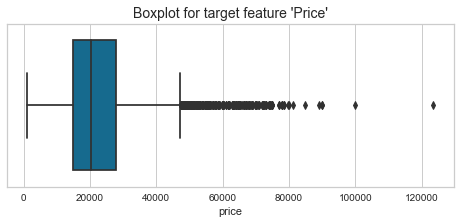

model  year   price transmission  mileage fuelType  tax   mpg  \
721   8 Series  2019   84898    Semi-Auto     3185   Petrol  145  24.4   
1813  8 Series  2019   88980    Semi-Auto       88   Petrol  145  24.4   
2909        M4  2017   89990    Semi-Auto     1336   Petrol  145  33.2   
3638  2 Series  2015  123456    Semi-Auto    33419   Diesel   20  68.9   
4776        M5  2019   89900    Semi-Auto     2269   Petrol  145  24.1   
5362        M4  2016   99950    Automatic      771   Petrol  300  33.2   
5877        M5  2019   81140    Semi-Auto      551   Petrol  145  24.1   

      engineSize engine_category  top_speed  acceleration_min  engine_hp  
721          4.4      big_engine      155.0               4.5      435.0  
1813         4.4      big_engine      155.0               4.5      435.0  
2909         3.0      big_engine      164.5               4.2      473.0  
3638         2.0   medium_engine      130.0               9.1      138.0  
4776         4.4      big_engine      155.0               3.3      625.0  
5362         3.0      big_engine      164.5               4.2      473.0  
5877         4.4      big_engine      155.0               3.3      625.0

In [27]:
# Check outliers in sale price
fig = plt.figure(figsize=(8,3))
sns.boxplot(data.price)
plt.title("Boxplot for target feature 'Price'", fontsize=14)
plt.show()
display(data[data.price>80000])

From the plot we can see that the target variable contains many outliers.
Few of them, with price over 90K, are especially extreme. On the modeling stage we will check if removing outliers helps to improve the model performance. 

On the next step we will calculate skewness for the target price and test the most common transformation methods to remove it. 

#### 2.1.2 Check distribution of `Price` variable and remove skewness

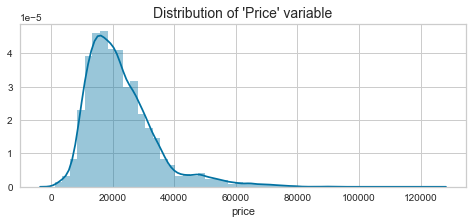

Skewnesss of 'Price' variable distribution before transformation is 1.59.


In [28]:
# Calculate skewness before transformation and plot distribution of 'Price' variable
fig = plt.figure(figsize=(8,3))
sns.distplot(data.price, kde=True)
plt.title("Distribution of 'Price' variable", fontsize=14)
plt.show()
print("Skewnesss of 'Price' variable distribution before transformation is {}.".format(round(skew(data.price),2)))

In [29]:
# Check log transformation for 'Price' variable to remove skewness
transformed = data['price']
data.loc[:, 'price_transformed'] = np.log(transformed)
print("Skewnesss of 'Price' variable distribution after log transformation is {}."
      .format(round(skew(data.price_transformed),2)))

Skewnesss of 'Price' variable distribution after log transformation is -0.24.


In [30]:
# Square Root Transform transformation for 'Price' variable to remove skewness
data['price_transformed'] = np.sqrt(transformed)
print("Skewnesss of 'Price' variable distribution after Square Root transformation is {}."
      .format(round(skew(data.price_transformed),2)))

Skewnesss of 'Price' variable distribution after Square Root transformation is 0.7.


In [31]:
# BoxCox transformation
transformed = data['price']
data['price_transformed'] = stats.boxcox(transformed)[0]
box_cox_tranform_coef = stats.boxcox(transformed)[1]
print("Skewnesss of 'Price' variable distribution after BoxCox transformation is {}."
      .format(round(skew(data.price_transformed),2)))

Skewnesss of 'Price' variable distribution after BoxCox transformation is 0.01.


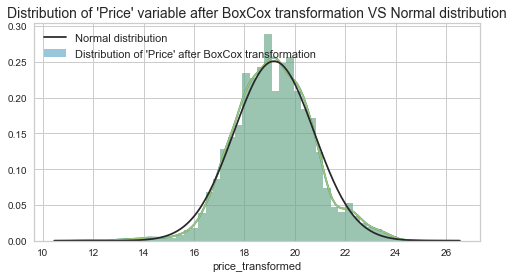

In [32]:
# BoxCox transformation gave the best results. Lets plot distribution of 'Price' variable after transformation
fig = plt.figure(figsize=(8,4))
sns.distplot(data.price_transformed,kde=True) 
sns.distplot(data.price_transformed, fit=stats.norm)
plt.title("Distribution of 'Price' variable after BoxCox transformation VS Normal distribution", fontsize=14)
plt.legend(labels=["Normal distribution","Distribution of 'Price' after BoxCox transformation"], loc ='upper left', fontsize=11)
plt.show()

Good! After transformation the new target variable `price_transformed` is almost normally distributed.  

### 2.2 Analyze correlation of price with categorical variables

#### 2.2.1 Analyze `model` feature

BMW grouping of Series and Models conventions (Ref. 15):
- Series with even numbers - sportier coupe-style vehicles (2 Series, 4 Series and 6 Series). The smaller is a number in Series - the smaller (and less expensive) is a vehicle. 
- Series with odd numbers - sedan-style vehicles (3 Series, 5 Series and 7 Series). The smaller is a number in Series - the smaller (and less expensive) is a vehicle. 
- X Models – SUVs and crossovers (or what BMW refers to as Sports Activity Vehicles and Sports Activity Coupes).
- Z Models – two door roadsters.
- M Models – high-performance version of many BMW models are grouped into the M Models (e.g. the M3 is a high-performance version of the 3 Series sedan). 'M' stands for Motorsport.
- i – electric and plug-in hybrid vehicles.

Let's add a new feature with model groupings and look how it correlates with the price.

In [33]:
# Add model_group and model_series features

def create_model_group_and_series (data=data):
    # Extract letter and number from 'model' column
    data['model_group'] = [re.findall('[A-z]+', i)[0] for i in data.model]
    data['model_series'] = [re.findall('[0-9]+', i)[0] for i in data.model]
    data['model_series'] = data.model_series.astype('int')
    # Add 'coupe_style' and 'sedan_style' model groups
    data.loc[(data.model.str.contains('2 Series'))|
        (data.model.str.contains('4 Series')), 'model_group'] = 'coupe_style_small'
    data.loc[(data.model.str.contains('1 Series'))|
         (data.model.str.contains('3 Series')), 'model_group'] = 'sedan_style_small'
    data.loc[(data.model.str.contains('5 Series'))|
         (data.model.str.contains('6 Series')), 'model_group'] = 'sedan_coupe_mid_size'
    data.loc[(data.model.str.contains('8 Series')), 'model_group'] = 'coupe_big_size'
    data.loc[(data.model.str.contains('7 Series')), 'model_group'] = 'sedan_big_size'

In [34]:
create_model_group_and_series()

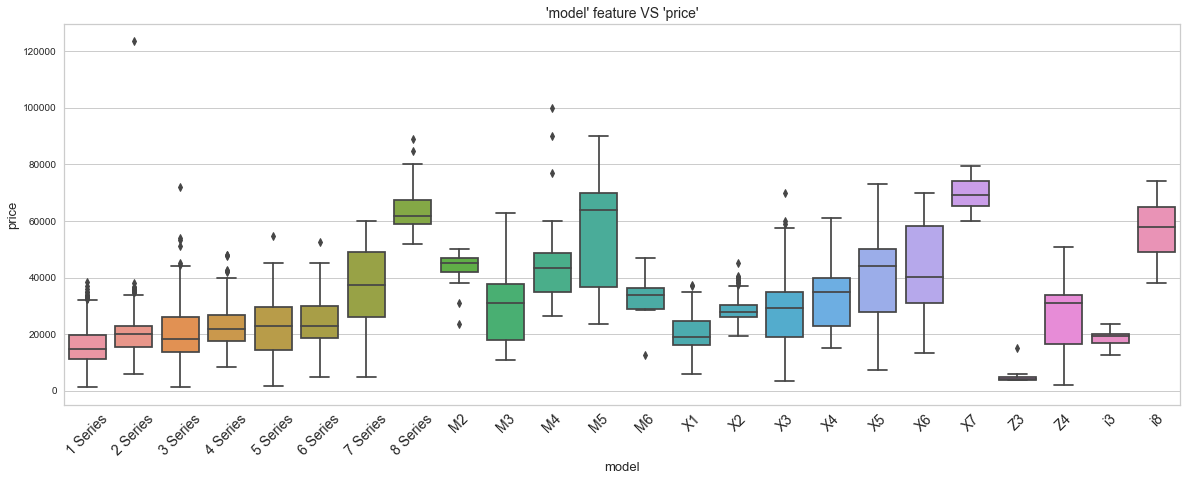

In [35]:
plt.figure(figsize=(20,7))
ax = sns.boxplot(x='model', y='price', data=data.sort_values(by='model'))
ax.axes.set_title("'model' feature VS 'price'", fontsize=14)
ax.set_xlabel('model', fontsize=13)
ax.set_ylabel('price', fontsize=13)
ax.set_xticklabels(labels=data.sort_values(by='model').model.unique(), size=14, rotation=45)
plt.show()

`Model` feature seems to play important role in determining the car price. 

Almost for all model groups bigger cars seem to be more expensive with the exception of `M` model group. In this model group `M2` model on average is more expensive than `M3` and `M4`. Also `M6` model have surprisingly low price on average. 

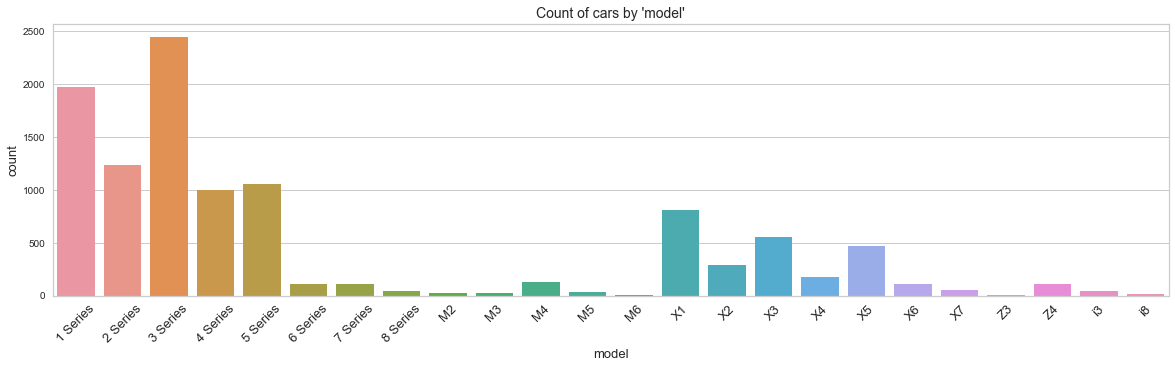

In [36]:
plt.figure(figsize=(20,5))
ax = sns.countplot('model', data=data.sort_values(by='model'))
ax.axes.set_title("Count of cars by 'model'", fontsize=14)
ax.set_xlabel('model', fontsize=13)
ax.set_ylabel('count', fontsize=13)
ax.set_xticklabels(labels=data.sort_values(by='model').model.unique(), size=13, rotation=45)
plt.show()

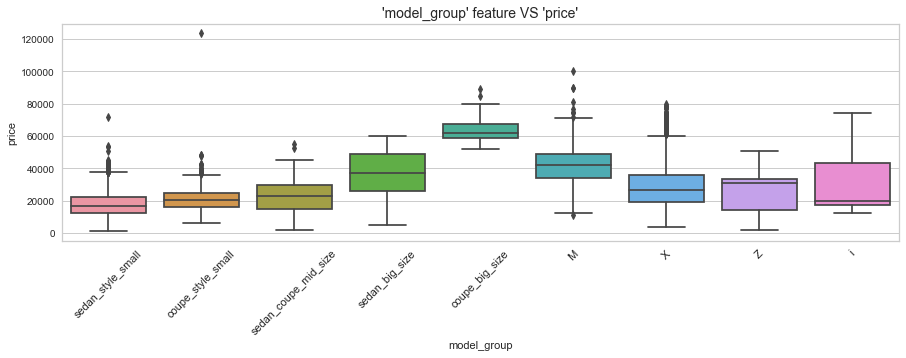

In [37]:
plt.figure(figsize=(15,4))
ax = sns.boxplot(x='model_group', y='price', data=data.sort_values(by='model'))
ax.axes.set_title("'model_group' feature VS 'price'", fontsize=14)
ax.set_xticklabels(labels=data.sort_values(by='model').model_group.unique(), size=11, rotation=45)
plt.show()

From the figures we can see that smaller cars from `Series` grouping are the most popular ones (41% are sedan style and 21% coupe style, which gives significant 62% in total). These cars also have the lowest average price among other groups.

On the second place by popularity are SUVs and crossovers of X series which take share of 23%. On the third place by share are mid-size sedan type car of 5 Series model (this model is part of `sedan_coupe_mid_size` group, as for the other model in this group - 6 Series - there are much less observations of it in our dataset).  

Electric (i models), performance (M models), roadsters (Z models) and big coupe style (6 Series   Series) vehicles take share of 5% in total. Cars from these groups have different distributions against price. What is interesting is that electric cars from of i series have pretty wide range in price (from 1595 to 88980) but median has pretty low value - 23980, so half of cars in this category have price below 23980.

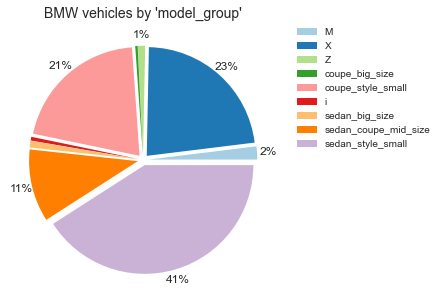

In [38]:
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > 1 else ''

sns.set_palette(sns.color_palette("Paired"))
labels, frequencies = np.unique(data.model_group.values, return_counts = True)
plt.figure(figsize = (5,5))
plt.pie(frequencies, labels = None, autopct = my_autopct, explode = ([0.05]*9), pctdistance = 1.1)
plt.title("BMW vehicles by 'model_group'", fontsize=14)
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 2.2.2 Analyze `fuelType` feature

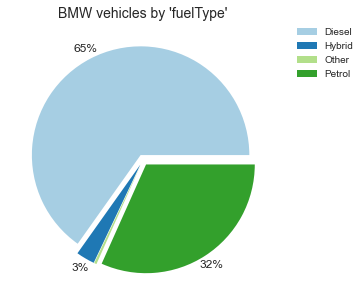

In [40]:
labels, frequencies = np.unique(data.fuelType.values, return_counts = True)
plt.figure(figsize = (5,5))
plt.pie(frequencies,labels = None, autopct = my_autopct, pctdistance = 1.1, explode=([0.05]*4))
plt.title("BMW vehicles by 'fuelType'", fontsize=14)
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

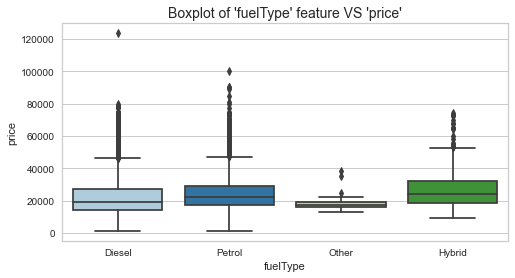

In [41]:
plt.figure(figsize = (8,4))
sns.boxplot(x='fuelType', y='price', data=data)
plt.title("Boxplot of 'fuelType' feature VS 'price'", fontsize=14)
plt.show()

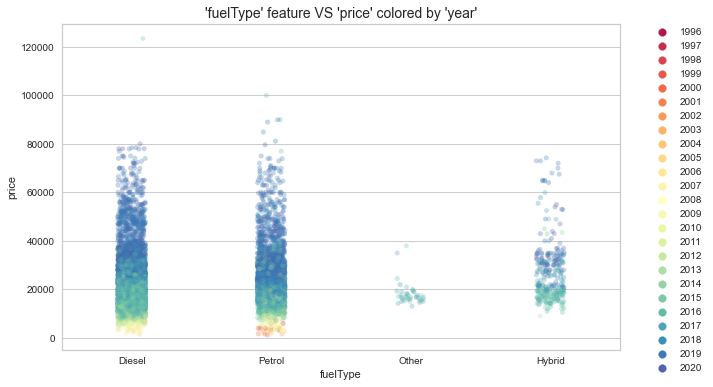

In [42]:
plt.figure(figsize = (10,6))
cmap = sns.color_palette("Spectral",  n_colors=25)
fig = sns.stripplot(x='fuelType', y='price', hue='year', data=data, alpha=.3, palette=cmap, 
                    hue_order=data.year.sort_values().unique())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("'fuelType' feature VS 'price' colored by 'year'", fontsize=14)
plt.show()

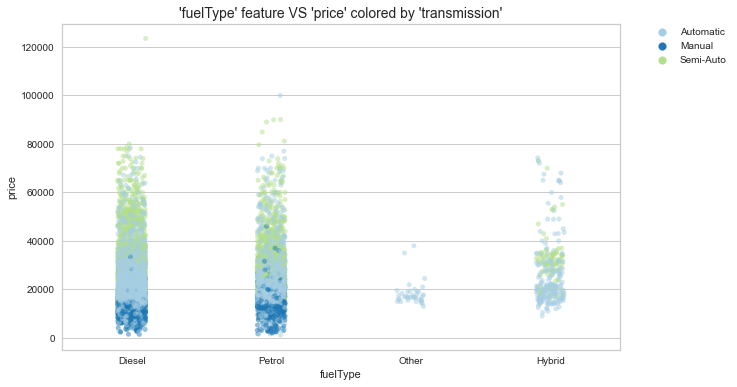

In [43]:
plt.figure(figsize = (10,6))
cmap = sns.color_palette("Spectral",  n_colors=25)
fig = sns.stripplot(x='fuelType', y='price', hue='transmission', data=data, alpha=.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("'fuelType' feature VS 'price' colored by 'transmission'", fontsize=14)
plt.show()

We can see for the figures that range of prices from 25 to 75 percentile for the cars with `Diesel`, `Hybrid` and `Petrol` engines does not differ much. Cars with `Other` fuel type have more narrow range, but it's less then 1% of cars of this category in the data. 

`fuelType` feature seems to not influence price much. In all plots we don’t see specific patterns of price correlation from `fuelType`.

`year`/`transmission` features  on the other hand have more importance for predicting price. For example plot `fuelType` VS `price` colored by `year` shows:
- cars older than from 2010 have only `Diesel` and `Petrol` engines and have lower prices. 
- as for middle age cars (from 2010 to 2018) - there are cars with all 4 types of fuel among them and they belong to middle price range.
- cars that are from 2018 or newer tend to be on a higher end as for the price.
- the highest prices are for very new cars with `Diesel` and `Petrol` fuel types.

From plot `fuelType` VS `price` colored by `transmission` we can see that less expensive cars seem to have `Manual` transmission, among middle price cars `Automatic` transmission prevails and the most expensive cars tend to have `Semi-Auto`/`Automatic` transmission.

#### 2.2.3 Analyze`transmission` feature

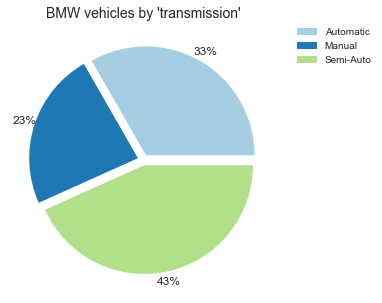

In [44]:
labels, frequencies = np.unique(data.transmission.values, return_counts = True)
plt.figure(figsize = (5,5))
plt.pie(frequencies,labels = None, autopct = '%1.0f%%', pctdistance = 1.1, explode=([0.05]*3))
plt.title("BMW vehicles by 'transmission'", fontsize=14)
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

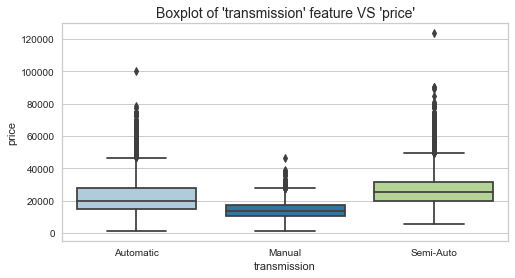

In [45]:
plt.figure(figsize = (8,4))
sns.boxplot(x='transmission', y='price', data=data)
plt.title("Boxplot of 'transmission' feature VS 'price'", fontsize=14)
plt.show()

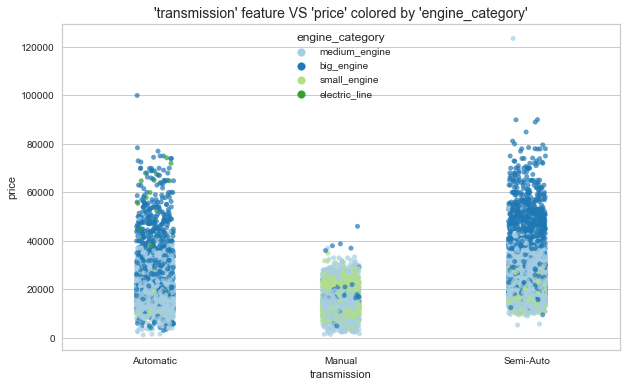

In [46]:
plt.figure(figsize = (10,6))
fig = sns.stripplot(x='transmission', y='price', data=data, hue='engine_category', alpha=0.7)
plt.title("'transmission' feature VS 'price' colored by 'engine_category'", fontsize=14)
plt.show()

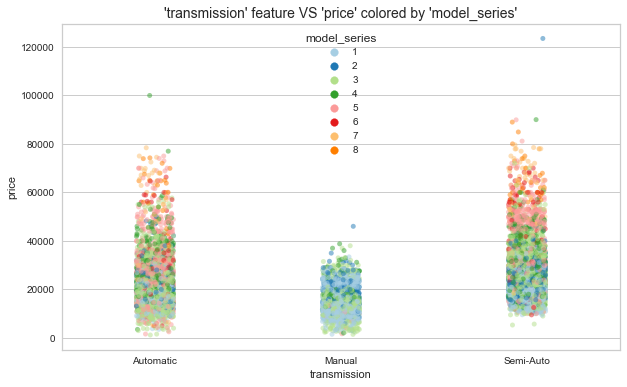

In [47]:
cmap = sns.color_palette("Spectral",  n_colors=8)
plt.figure(figsize = (10,6))
fig = sns.stripplot(x='transmission', y='price', data=data, hue='model_series', alpha=.5)
plt.title("'transmission' feature VS 'price' colored by 'model_series'", fontsize=14)
plt.show()

Figures above confirms what we saw in the previous section, they show that `transmission` feature have an impact on price, cars with `Automatic` and `Semi-Auto` transmission have wider price range and on average tend to be more expensive than cars with `Manual` transmission. 

Also cars in a segment of higher prices tend to belong to bigger models, have bigger engines and have `Automatic`/`Semi-Auto` transmission.

In [48]:
# Let's add boolean feature _big_engine_auto_or_semi_auto, maybe it can be useful on the modeling stage

def create__big_engine_auto_semi_auto (data=data):
    data.loc[(data.transmission!='Manual')&(data.engine_category=='big_engine'), '_big_engine_auto_semi_auto']='1'
    data._big_engine_auto_semi_auto.fillna(0, inplace=True)
    data._big_engine_auto_semi_auto=data._big_engine_auto_semi_auto.astype('int')
create__big_engine_auto_semi_auto()

#### 2.2.4 Analyze `engine_category` feature

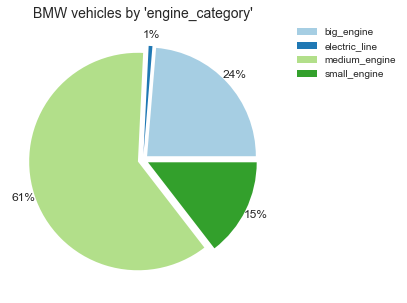

In [49]:
labels, frequencies = np.unique(data.engine_category.values, return_counts = True)
plt.figure(figsize = (5,5))
plt.pie(frequencies,labels = None, autopct = '%1.0f%%', pctdistance = 1.1, explode=([0.05]*4))
plt.title("BMW vehicles by 'engine_category'", fontsize=14)
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

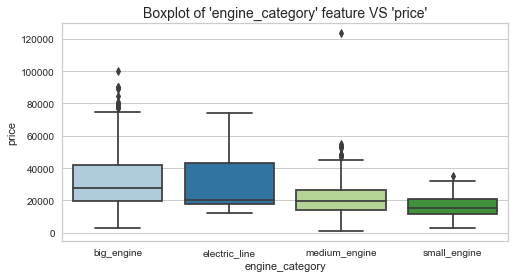

In [50]:
plt.figure(figsize = (8,4))
sns.boxplot(x='engine_category', y='price', data=data.sort_values(['engine_category']))
plt.title("Boxplot of 'engine_category' feature VS 'price'", fontsize=14)
plt.show()

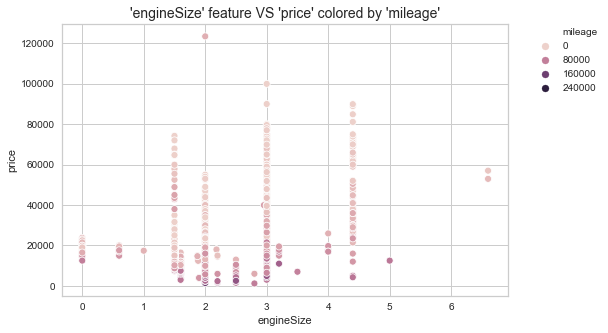

In [51]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='engineSize', y='price', data=data, hue='mileage')
plt.title("'engineSize' feature VS 'price' colored by 'mileage'", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

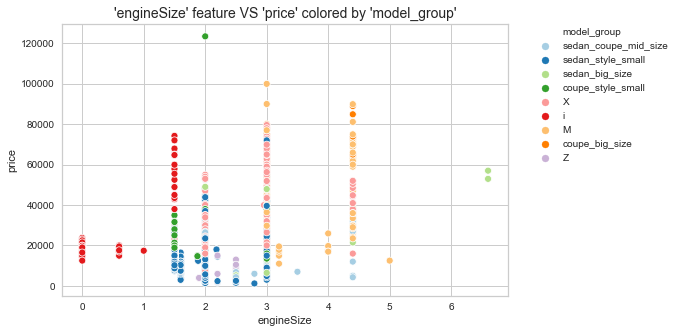

In [52]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='engineSize', y='price', data=data, hue='model_group')
plt.title("'engineSize' feature VS 'price' colored by 'model_group'", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

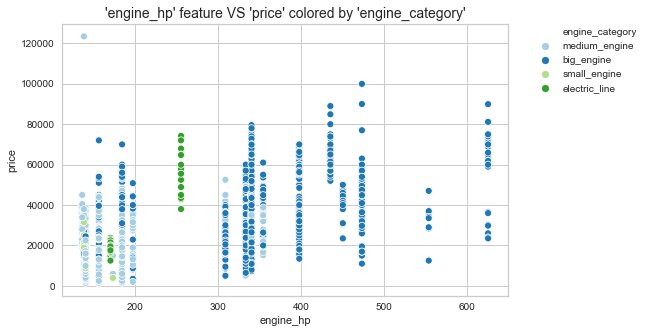

In [53]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='engine_hp', y='price', data=data, hue='engine_category')
plt.title("'engine_hp' feature VS 'price' colored by 'engine_category'", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can see that price range varies depending of `engine_category` of a car. 

Figures above show: 
-  for conventional fuel type cars there is a tendency: bigger is an engine - higher is an average price and wider is a price range becomes. But there are also cars with below average price among the ones with medium/big engines size, they tend to have high `mileage` values and belong to models groups `sedan_coupe_mid_size` and `sedan_style_small`.

- cars from electric lines engines tend to have less power, but price for them tends to be more expensive than for `small_engine`/`medium_engine` categories. Probably buyers are ready to compromise on less engine power in return to ability to use electric engine. Cars from electric line have two clusters: the first cluster is cars with low power engine and average price and the second cluster is of cars with higher power of engine and high-end price segment. But most of cars in electric line from the data are in the below-average price segment, as median for them is equal to 19898.

#### 2.2.5  Correlation matrix for encoded categorical variables

In [54]:
categorical_without_model = pd.get_dummies(data[['transmission', 'fuelType', 'engine_category', 'model_group']], 
                                           drop_first=True)
categorical_model = pd.get_dummies(data.model, drop_first=True)

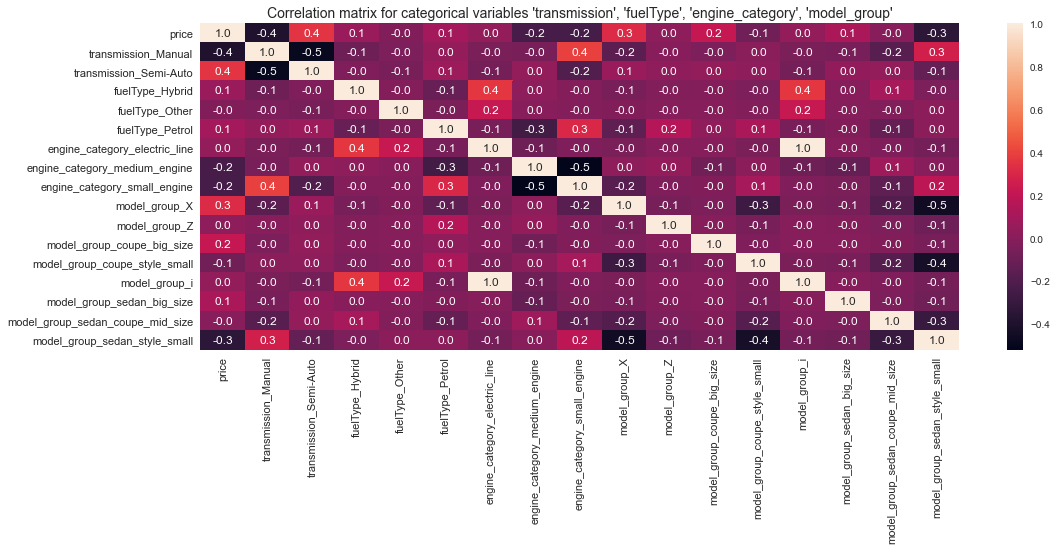

In [55]:
# Correlation matrix for categorical variables 'transmission', 'fuelType', 'engine_category', 'model_group'
plt.figure(figsize = (17,6))
corr_matrix = pd.concat([data.price, categorical_without_model], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, fmt = '.1f')
plt.title("Correlation matrix for categorical variables 'transmission', 'fuelType', 'engine_category', 'model_group'", 
          fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

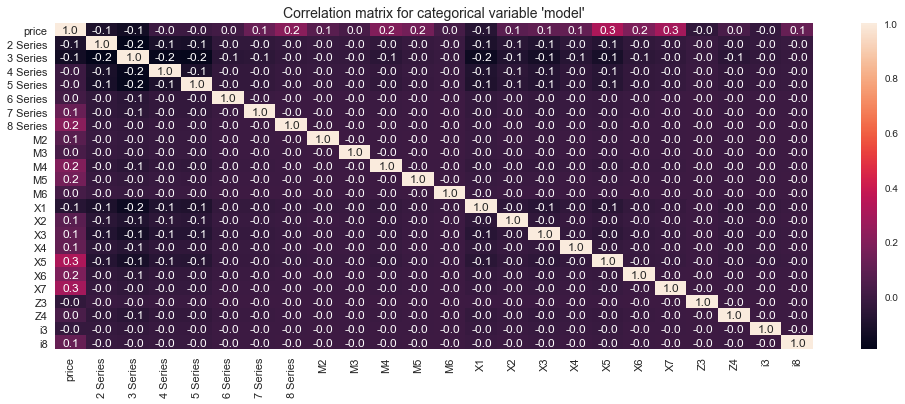

In [56]:
# Correlation matrix for categorical variable 'model'
plt.figure(figsize = (17,6))
corr_matrix = pd.concat([data.price, categorical_model], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, fmt = '.1f')
plt.title("Correlation matrix for categorical variable 'model'", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

From the correlation matrix we can see that some features do no not have correlation with the price. We need to pay attention to this on the modeling stage, test feature selection and regularization methods during model building. 

#### 2.2.6 Run 1-way ANOVA test for categorical variables

Since there is no correlation to price of quite a few encoded categorical variables, let’s check if there is a statistically significant difference in price for cars grouped by each categorical variable.

The null hypothesis for this test is that difference in mean price by group is statistically significant (variation in price between different groups can be a random noise due to the sampling effect).

In the results of this test we will compare the p-value to our chosen alpha. As a rule of thumb in our case we will choose alpha=0.05. If our p-value is smaller than 0.05, then we can reject the null hypothesis in favor of the alternative: this means that at least one group price mean is significantly different. If our p-value is larger than 0.05, then we cannot reject our null hypothesis and we cannot accept our alternative.

In [57]:
categorical_columns=['model', 'transmission', 'fuelType', 'engine_category', 'model_group']
for i in categorical_columns:
    lm = ols('price_transformed~{}'.format(i), data=data).fit()
    print('')
    print(colored("Results of 1-way ANOVA test for '{}' variable:".format(i), attrs=['bold']))
    table = sm.stats.anova_lm(lm)
    display(table)
    if table['PR(>F)'][0] <0.05:
        print("We can reject the null hypothesis for '{}' variable. At least one '{}' group mean in price is significantly different.".format(i, i))
    else:
        print("We cannot reject null hypothesis and we cannot accept the alternative for '{}' variable.".format(i))


Results of 1-way ANOVA test for 'model' variable:


df        sum_sq     mean_sq           F  PR(>F)
model        23.0   9980.792999  433.947522  269.950435     0.0
Residual  10757.0  17291.965059    1.607508         NaN     NaN

We can reject the null hypothesis for 'model' variable. At least one 'model' group mean in price is significantly different.

Results of 1-way ANOVA test for 'transmission' variable:


df        sum_sq      mean_sq            F  PR(>F)
transmission      2.0   6969.273473  3484.636737  1849.801427     0.0
Residual      10778.0  20303.484584     1.883790          NaN     NaN

We can reject the null hypothesis for 'transmission' variable. At least one 'transmission' group mean in price is significantly different.

Results of 1-way ANOVA test for 'fuelType' variable:


df        sum_sq     mean_sq          F        PR(>F)
fuelType      3.0    518.542223  172.847408  69.625532  1.370200e-44
Residual  10777.0  26754.215834    2.482529        NaN           NaN

We can reject the null hypothesis for 'fuelType' variable. At least one 'fuelType' group mean in price is significantly different.

Results of 1-way ANOVA test for 'engine_category' variable:


df        sum_sq      mean_sq          F  PR(>F)
engine_category      3.0   5152.815296  1717.605099  836.82993     0.0
Residual         10777.0  22119.942761     2.052514        NaN     NaN

We can reject the null hypothesis for 'engine_category' variable. At least one 'engine_category' group mean in price is significantly different.

Results of 1-way ANOVA test for 'model_group' variable:


df        sum_sq     mean_sq           F  PR(>F)
model_group      8.0   6271.224516  783.903065  402.075581     0.0
Residual     10772.0  21001.533541    1.949641         NaN     NaN

We can reject the null hypothesis for 'model_group' variable. At least one 'model_group' group mean in price is significantly different.


From the results 1-way ANOVA test we can conclude that in each variables at least on group have statistically significant impact on the price.
The most important features according to F-value (statistic value for significance of adding model terms) are: 
- `transmission` (F=1851),
- `engine_category`(F=836),
- `model_group`(F=445).

### 2.3 Analyze correlation of `price` with numerical variables

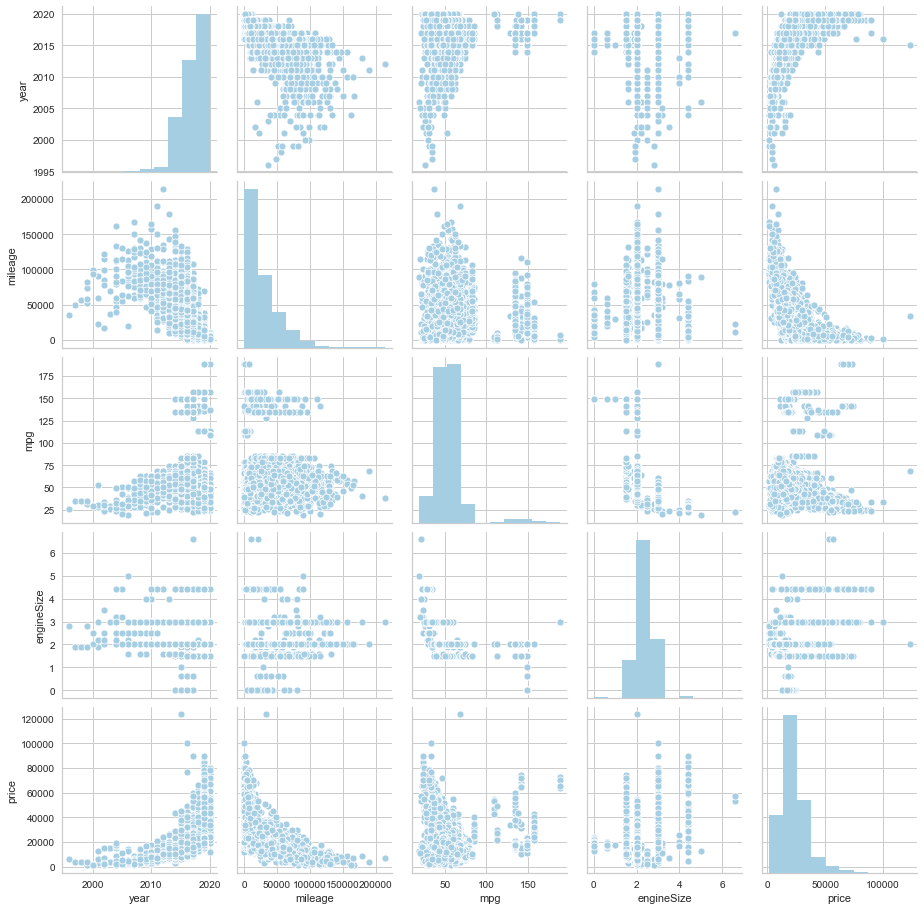

In [58]:
# Explore pairplot for numerical variables from the initial data: 'year', 'mileage', 'mpg', 'engineSize', 'price'
sns.pairplot(data[['year', 'mileage', 'mpg', 'engineSize', 'price']])
plt.show()

From the plot we can see that there is pretty strong correlation between `price` and `year`/`mileage` variables. In the same time `mileage` seem to have strong negative correlation with the `year`, which makes sense: the older car is - the higher is average mileage.

Relationship of `year` and `price` variables can be described as an exponential function and between `mileage` and `price` as an inverse square function.
A quick glance at this figure shows that there’s also a moderate correlation between the `price` and `mpg`/`engineSize` variables. 

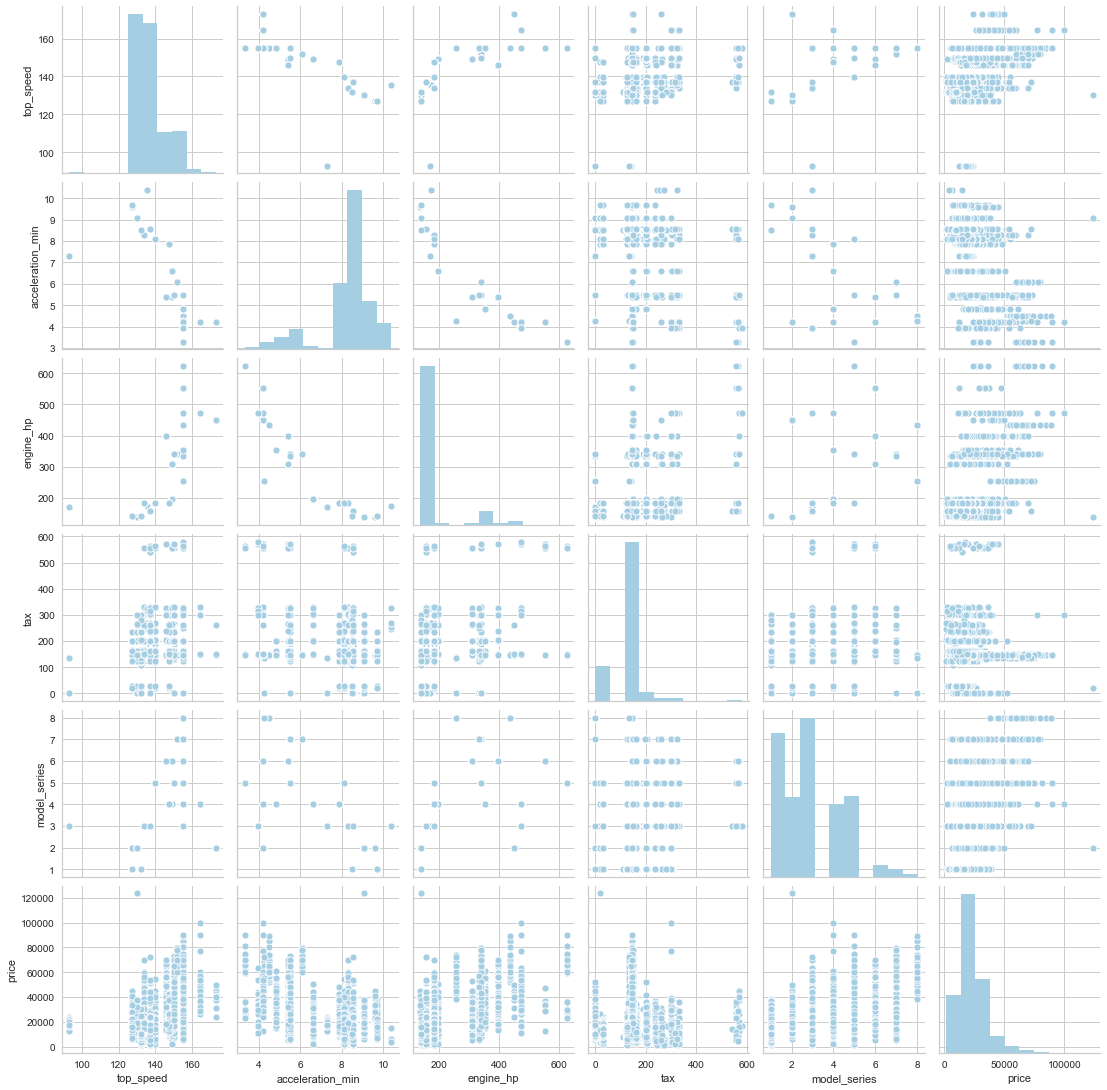

In [59]:
# Explore pairplot for numerical variables: 'top_speed', 'acceleration_min', 'engine_hp', 'tax', 'model_series'
f = sns.pairplot(data[['top_speed', 'acceleration_min', 'engine_hp', 'tax', 'model_series', 'price']])
#f.set_yticklabels(size=12)
#f.set_yticklabels(f.get_yticks(), size = 15)
plt.show()

From the figure above we can see that there is moderate linear dependency of `price` from all the features with the exception of the `tax` feature.

Bigger cars, cars with higher top speed and more powerful engines seem to be more expensive, while correlation with the acceleration feature is negative: the less time a car needs to accelerate to 62mph - the more expensive it tends to be.

As for `tax` feature - we can't see a pattern on how `tax` affect price, if there is a relationship between road tax and price - it`s non-linear.

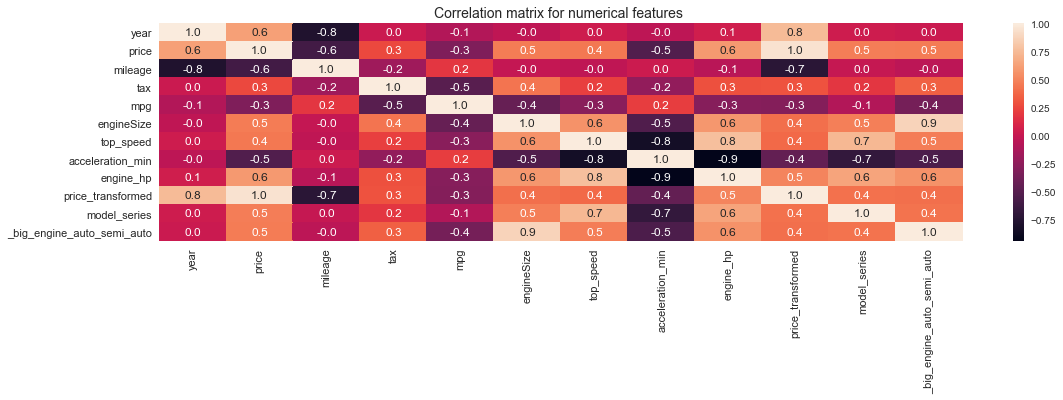

In [60]:
# Check correlation matrix 
corr_matrix = data.corr()
plt.figure(figsize=(18,4))
plt.title('Correlation matrix for numerical features ', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
fig = sns.heatmap(corr_matrix, annot=True, fmt = '.1f')

From the plot above we can see that all numerical features are moderately correlated with the target variable price.
- the highest correlation of `price` is with `year`, `mileage`, and `engine_hp` features (0.6 and -0.6 coefficients);
- `engineSize`, `top_speed`, `acceleration_min` and `model_series` have a a bit lower correlation (0.5, 0.4 and -0.5 coefficients);
- `mpg` and `tax` features have the lowest correlation with the `price` (0.3 and -0.3 respectively) - probably lower correlation coefficient for these features is connected to the fact that relation is not linear.

We can see that some independent variables have strong correlation between each other:
-	`year` and  `mileage`,
-	`top_speed` and `engine_hp`,
-	`acceleration_min`  and `model_series`, `engine_hp`, `top_speed`.

We need to check if it;s better to remove some variables on modeling stage to prevent multicollinearity issues. 

#### 2.3.1 Explore if variables are independent: variance_inflation_factor

Multicollinearity can negatively affect performance of Linear Regression model, let's calculate statistic variance_inflation_factor to check correlation between an explanatory variables pairs - `year` and `mileage`; `top_speed` and `engine_hp`; `acceleration_min` and `model_series`/`engine_hp`/`top_speed`:
- a value of 1 indicates there is no correlation between a given explanatory variable and  other explanatory variables in the model.
- a value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.
- a value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

In [61]:
# Gather features
features = 'year+mileage+tax+mpg+engineSize+top_speed+acceleration_min+engine_hp+model_series'
# Get y and X dataframes based on this regression:
y, X = dmatrices('price ~' + features, data, return_type='dataframe')
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
display(vif.round(1))

VIF Factor          features
0   1927333.5         Intercept
1         2.6              year
2         2.7           mileage
3         1.5               tax
4         1.6               mpg
5         2.0        engineSize
6         4.4         top_speed
7        11.9  acceleration_min
8         9.9         engine_hp
9         2.4      model_series

We can conclude from calculated variance_inflation_factor:
- for `year` and `mileage` variables there is a moderate correlation with other variables. Since this value is below 5 - it should not cause problems on modeling stage.
- for `top_speed` and `engine_hp` - it's advisable to remove `engine_hp` feature before training a model.
- for `acceleration_min`  and `model_series`/`engine_hp`/`top_speed` - it's advisable to remove `acceleration_min` feature before training a model as it correlates too much with other features.

#### 2.3.2 Analyze `year` feature

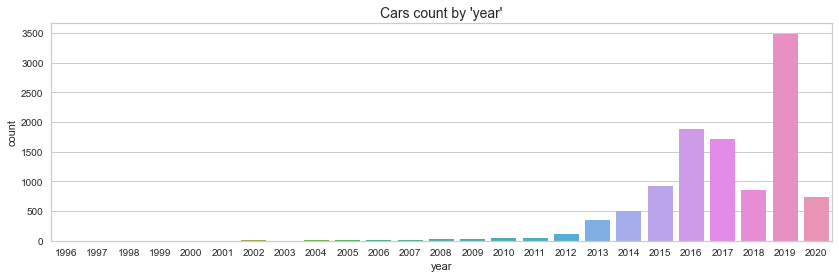

In [62]:
plt.figure(figsize = (14,4))
sns.countplot(data.year)
plt.title("Cars count by 'year'", fontsize=14)
plt.show()

Most cars in our dataset is pretty new, which make sense since average age of cars on the road in the UK was 7.7 years old in 2016.

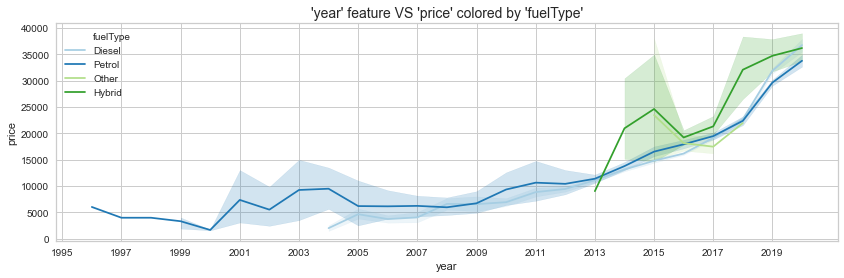

In [63]:
plt.figure(figsize=(14,4))
sns.lineplot(x='year', y='price', data=data, hue='fuelType')
plt.title("'year' feature VS 'price' colored by 'fuelType'", fontsize=14)
plt.xticks(np.arange(min(data.year)-1, max(data.year), 2))
plt.show()

Cars that are 10 years old or newer have strong tendency to have higher price for newer cars. As for older cars (10 years old and more) - correlation between `year` and `price` doesn't seem to be strong.

The `Hybrid` type cars that are presented in the data were all produced in 2013 or later and tend to be more expensive on average in comparison to other fuel types cars. 

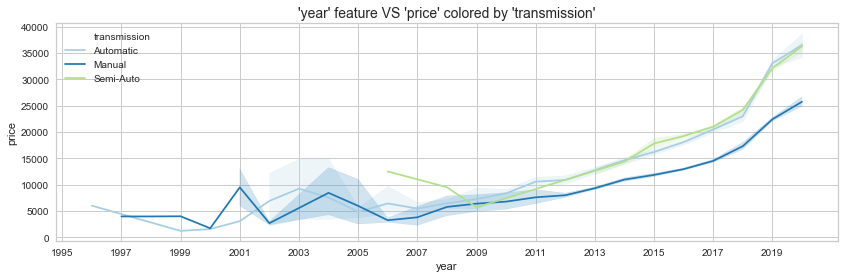

In [64]:
plt.figure(figsize=(14,4))
sns.lineplot(x='year', y='price', data=data, hue='transmission')
plt.title("'year' feature VS 'price' colored by 'transmission'", fontsize=14)
plt.xticks(np.arange(min(data.year)-1, max(data.year), 2))
plt.show()

Figure shows that `transmission` type doesn’t have much impact for older cars (from 2010 and older), while newer cars with `Automatic` and `Semi-auto` transmission tend to be more expensive than the ones with `Manual` transmission.

Looks like features affect pricing of cars differently for older cars (from 2010 and older) and for the newer cars (newer than 2010). Let's use the average age of cars in UK as a threshold to introduce a new boolean feature `_not_old_car`.

In [65]:
# Looks like correlation of 'year'/'transmission' and 'price' becomes stronger for newer cars 
# Let’s add feature '_not_old_car' for cars produced after 2013

def create__not_old_car (data=data):
    data.loc[(data.year>2013), '_not_old_car']='1'
    data._not_old_car.fillna(0, inplace=True)
    data._not_old_car=data._not_old_car.astype('int')
create__not_old_car()

#### 2.3.3 Analyze `mileage` feature

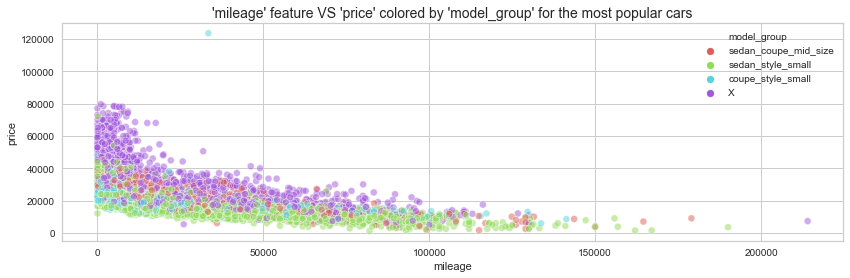

In [66]:
plt.figure(figsize=(14,4))
most_popular_cars = data[data.model_group.isin(['sedan_style_small', 'coupe_style_small', 'sedan_coupe_mid_size', 'X'])]
popular_cars_colors = sns.color_palette("hls", 4)

sns.scatterplot(x='mileage', y='price', data=most_popular_cars, hue='model_group', alpha=0.5, palette = popular_cars_colors )
plt.title("'mileage' feature VS 'price' colored by 'model_group' for the most popular cars", fontsize=14)
plt.show()

To improve readability only data for the most popular model groups was selected and plotted. On the plot we can see that these model groups are in different price segments and there is a visible correlation of `mileage` and `price` variables  within the model groups.

#### 2.3.4 Analyze `mpg` feature

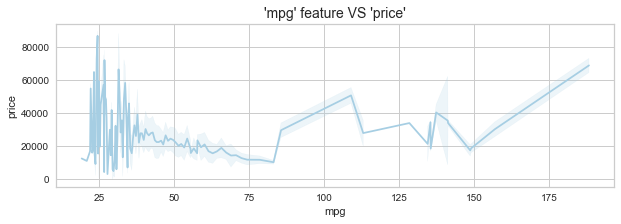

In [67]:
plt.figure(figsize=(10,3))
sns.lineplot(x='mpg', y='price', data=data, ci='sd')
plt.title("'mpg' feature VS 'price'", fontsize=14)
plt.show()

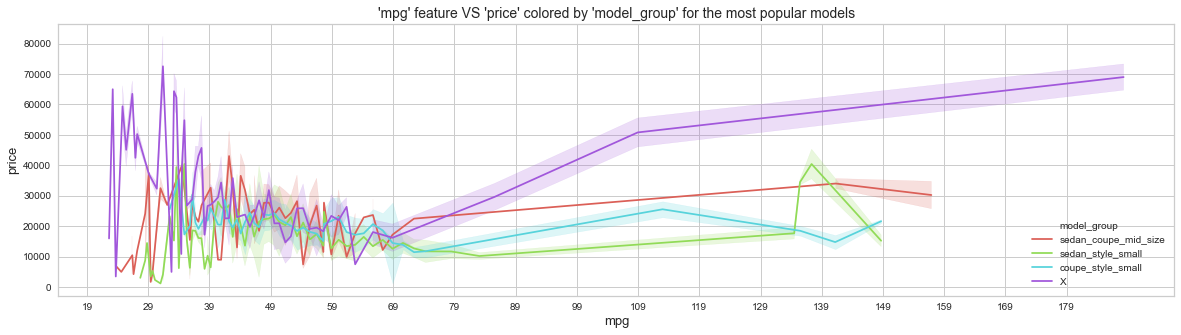

In [68]:
# Plot 'mpg' VS 'price' colored by 'model_group' for the most popular models
plt.figure(figsize=(20,5))
f = sns.lineplot(x='mpg', y='price', data=most_popular_cars, ci='sd', hue='model_group', palette = popular_cars_colors)
plt.title("'mpg' feature VS 'price' colored by 'model_group' for the most popular models", fontsize=14)
plt.xticks(np.arange(min(data.mpg)-0.1, max(data.mpg), 10))
f.set_xlabel('mpg', fontsize=13)
f.set_ylabel('price', fontsize=13)
plt.show()

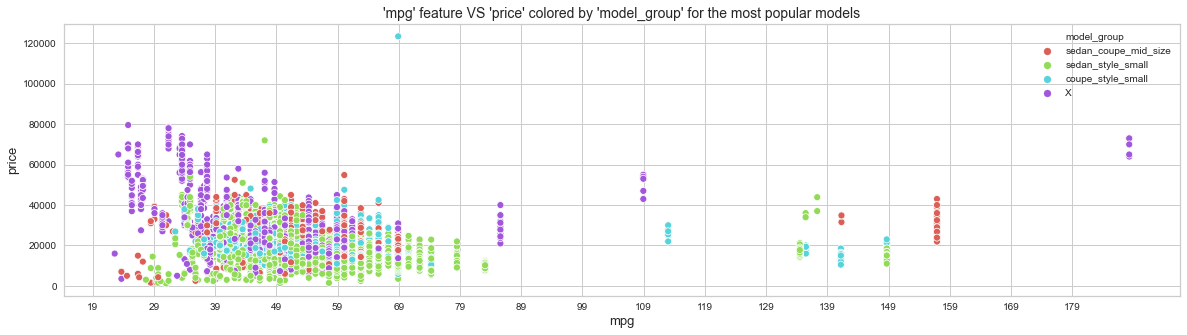

In [69]:
plt.figure(figsize=(20,5))
f = sns.scatterplot(x='mpg', y='price', data=most_popular_cars, ci='sd', hue='model_group', palette = popular_cars_colors)
plt.title("'mpg' feature VS 'price' colored by 'model_group' for the most popular models", fontsize=14)
plt.xticks(np.arange(min(data.mpg)-0.1, max(data.mpg), 10))
f.set_xlabel('mpg', fontsize=13)
f.set_ylabel('price', fontsize=13)
plt.show()

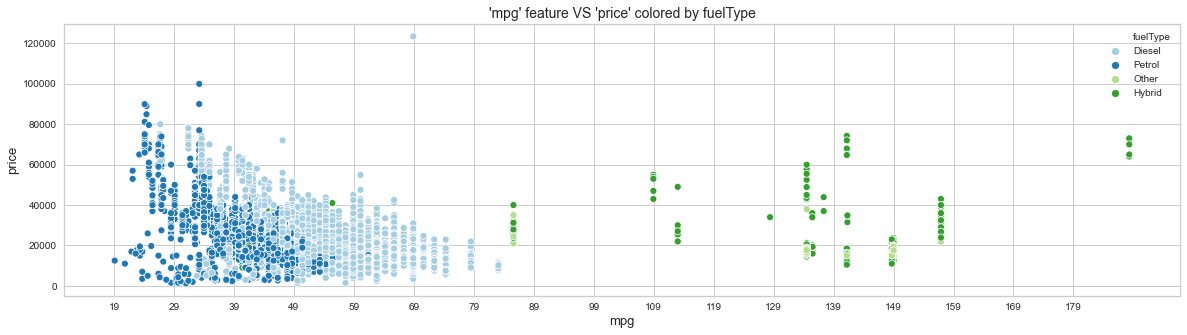

In [70]:
plt.figure(figsize=(20,5))
f = sns.scatterplot(x='mpg', y='price', data=data, ci='sd', hue='fuelType')
plt.title("'mpg' feature VS 'price' colored by fuelType", fontsize=14)
plt.xticks(np.arange(min(data.mpg)-0.1, max(data.mpg), 10))
f.set_xlabel('mpg', fontsize=13)
f.set_ylabel('price', fontsize=13)
plt.show()

From the plots we can see that there is a non-linear relationship between `mpg` and `price`.

- For `fuelType` = `Diesel` there seem to be a negative correlation: bigger `mpg` - lower the price,
- For `fuelType` = `Petrol` there is also a negative correlation of `mpg` and `price` features, that is even stronger that for `Diesel` fuelType.
- For `fuelType` = `Hybrid` and `Other` and mpg below 149 - there seem to be no correlation of `mpg` value and price,
- For `fuelType` = `Hybrid` and `Other` and mpg above 149 - there is a strong positive correlation of `mpg` value and price.

Let's create 2 new features derived from `mpg` feature to reflect found pattern. 

In [71]:
# Add 2 new features derived from 'mpg' feature
def create_mpg_1_and_mpg_2 (data=data):
    data.loc[data.fuelType=='Petrol', 'mpg_1'] = data.mpg
    data.loc[data.fuelType=='Diesel', 'mpg_2'] = data.mpg
    data.replace(np.nan, 0, inplace=True)
create_mpg_1_and_mpg_2()

#### 2.3.4 Analyze `engineSize` feature

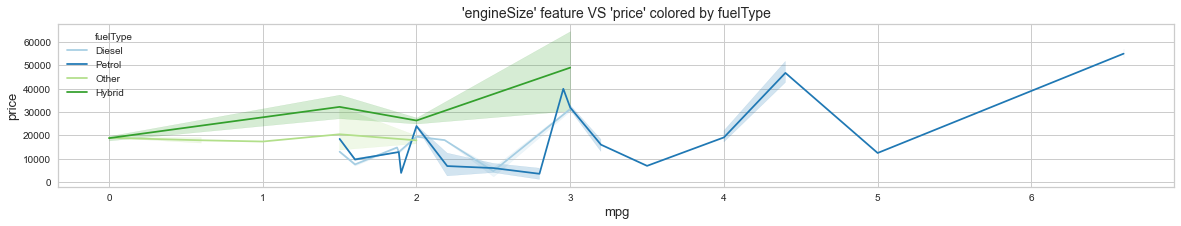

In [72]:
plt.figure(figsize=(20,3))
data_without_electric = data[~(data.model.str.contains('i3'))|(data.model.str.contains('i8'))]
f = sns.lineplot(x='engineSize', y='price', data=data, hue='fuelType')
plt.title("'engineSize' feature VS 'price' colored by fuelType", fontsize=14)
f.set_xlabel('mpg', fontsize=13)
f.set_ylabel('price', fontsize=13)
plt.show()

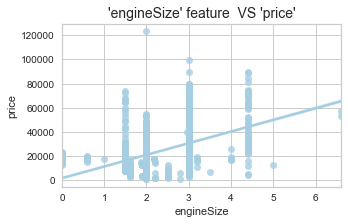

In [73]:
plt.figure(figsize=(5,3))
sns.regplot(x='engineSize', y='price', data=data)
plt.title("'engineSize' feature  VS 'price'", fontsize=14)
plt.show()

From the figures we can see that the trend seems to make sense: the bigger engine - higher price. Also as we already saw before - the cars with smaller engines, but with the `Hybrid` `fuelType` tend to have higher prices than cars with other `fuelType`.

#### 2.3.5 Analyze `tax` feature 

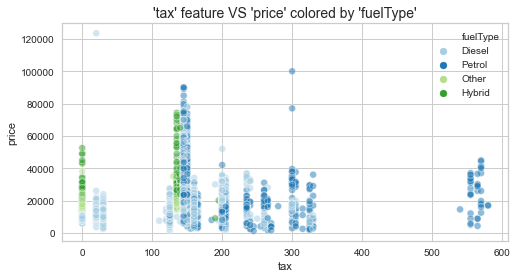

In [74]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='tax', y='price', data=data, hue='fuelType', alpha=0.5)
plt.title("'tax' feature VS 'price' colored by 'fuelType'", fontsize=14)
plt.show()

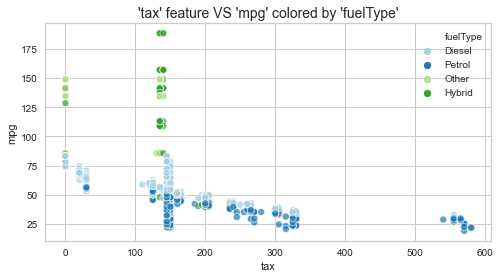

In [75]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='tax', y='mpg', data=data, hue='fuelType', alpha=0.7)
plt.title("'tax' feature VS 'mpg' colored by 'fuelType'", fontsize=14)
plt.show()

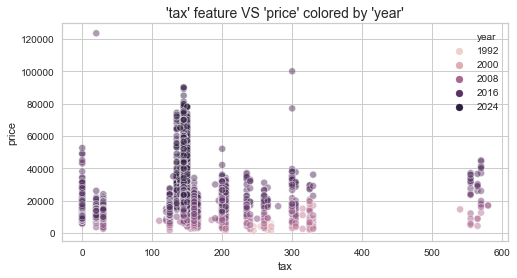

In [76]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='tax', y='price', data=data, hue='year', alpha=0.5)
plt.title("'tax' feature VS 'price' colored by 'year'", fontsize=14)
plt.show()

From the plots we can see that there is no strong correlation between `tax` feature and `price`. The first plot shows that cars with `Hybrid` and `Other` fuel types have lower or no tax which was expected. 

There is a linear relation between `tax` and `mpg` variables: the lower the `mpg` - the higher the `tax`, cars with alternative `fuelType` have especially high `mpg`.

The last plot shows that older cars tend to have higher road taxes, but surprisingly some relativity new cars are in the cluster with the highest tax rate (>500), these cars also have very low `mpg` values.

#### 2.3.6 Analyze  `model_series` feature

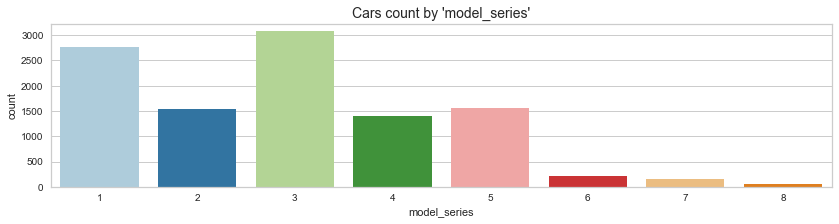

In [77]:
plt.figure(figsize = (14,3))
sns.countplot(data.model_series)
plt.title("Cars count by 'model_series'", fontsize=14)
plt.show()

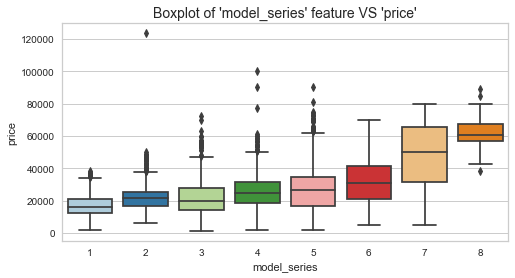

In [78]:
plt.figure(figsize=(8,4))
sns.boxplot(x='model_series', y='price', data=data)
plt.title("Boxplot of 'model_series' feature VS 'price'", fontsize=14)
plt.show()

From the plot we can see that `model_series` feature has moderate correlation with `price`: bigger models tend to have higher price. But what is interesting that among bigger models there are still cheap options. 

### 2.4 Summary 

**Target variable `price`.**
-	We applied Box-Cox transformation, so now variable `price_transformed` has almost normal distribution,
-	`Price` contains a lot of outliers, possibly removing them can improve model performance when using Liner Regression.

**Categorical variables `model`, `model_group`, `transmission`, `fuelType`, `engine_category`.**
- we extracted features `model_group` and `model_series` from `model`,
- during analyzing `engine_category` feature we found that cars with bigger engines tend to have higher price. But there are also cars with price below average among the ones with medium/big engines size, they tend to have high `mileage` values and belong to models groups `sedan_coupe_mid_size` and `sedan_style_small`.
- for all categorical features at least one group has statistically significant impact on the price. But in correlation matrix we saw that relation of a car to some of models/model groups doesn't correlate with the price, so we will check if it’s better to remove them.
- the most important features according to F-value are `transmission` (F=1851), `engine_category`(F=836), `model_group`(F=445).

**Numerical variables: `year`, `mileage`, `tax`, `mpg`, `engineSize`, `model_series`, `top_speed`, `acceleration_min`, `engine_hp`.**
-	`Year`, `mileage` and `engine_hp` features have the strongest correlation with price:

    - newer cars tend to have higher price, especially with `Hybrid` fuel type and `Automatic`/`Semi-Auto` transmission. We have mostly new cars in the dataset (from 2013 and newer). Correlation of `year` to `price` seem to be stronger for newer cars, so new boolean feature `_not_old_car` is added (for cars produced in 2013 or later).
    - different model lines seem to be in different price segments and there is a visible correlation of `mileage` and `price` within model groups.

-	`engineSize`, `top_speed`, `acceleration_min` and `model_series` features have moderate correlation with price.
    
-	`mpg` and `tax` features have the lowest correlation with the price due to non-linear dependency.  
    -	as for `mpg` feature there is a pattern of it correlation to price depending on `fuelType`: 
        - for `Petrol`/`Diesel` fuel type cars there is a moderate negative correlation of `mpg` feature and price, 
        - for cars with `Hybrid`/`Other` fuel type - there is almost no correlation if `mpg` is less than 145 and strong positive correlation of `mpg` feature and price when `mpg` is above 145. However, there are less than 4% of `Hybrid`/`Other` fuel type cars in ths dataset.
   
    -  There is a weak correlation between price and tax rate. Another finding is that `tax` feature is correlated with `mpg` and also older cars seem to have higher tax rates.

As the result of variance_inflation_factor analysis, we concluded that `top_speed` and `acceleration_min` features have to be removed before modeling stage to avoid multicollinearity. `engine_hp` feature has lower correlation with other features, but it's decided to remove it as well because the same variance of target should already by explained by `model` feature (as we filled  `engine_hp` based on the information about model).

## Step 3. Preprocess data for modeling <a name="6.3"></a>

Due to transformation of target `price`, now there is a linear relation between `price transformed` and `year`/`mileage` features.

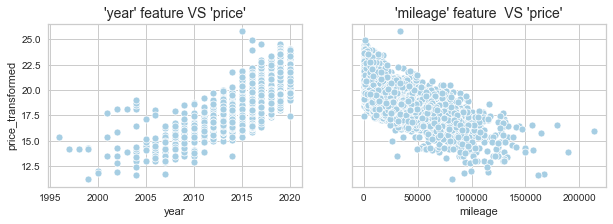

In [79]:
fig, axs = plt.subplots(ncols=2, figsize=(10,3), sharey=True)
sns.scatterplot(x='year', y='price_transformed', data=data, ax=axs[0])
sns.scatterplot(x='mileage', y='price_transformed', data=data, ax=axs[1])
axs[0].set_title("'year' feature VS 'price'", fontsize=14)
axs[1].set_title("'mileage' feature  VS 'price'", fontsize=14)
plt.show()

In [80]:
# Drop excessive features
data = data.drop(['engine_hp', 'acceleration_min', 'top_speed'], axis=1)

In [81]:
# Split data to train and test sets
train_df, test_df = train_test_split(data, 
                                     test_size=0.2, 
                                     random_state=seed, 
                                     stratify=data[["model"]])

In [82]:
# Separate features and target
y_train = train_df['price_transformed']
X_train_df = train_df.drop(['price', 'price_transformed'], axis=1)
X_test_df = test_df.drop(['price', 'price_transformed'], axis=1)
y_test = test_df['price_transformed']

In [83]:
# Standardize the data: StandardScaler for numerical features and OneHotEncoding for categorical features
scaler=StandardScaler()
encoder = OneHotEncoder(drop='first')
X_train_num =  scaler.fit_transform(X_train_df.select_dtypes(exclude='object'))
X_test_num = scaler.transform(X_test_df.select_dtypes(exclude='object'))
X_train_cat = encoder.fit_transform(X_train_df.select_dtypes(include='object'))
X_test_cat = encoder.transform(X_test_df.select_dtypes(include='object'))

# Combine preprocces features 
X_train = np.concatenate((X_train_num, X_train_cat.toarray()), axis=1)
X_test = np.concatenate((X_test_num, X_test_cat.toarray()), axis=1)

## Step 4. Cluster analysis <a name="6.4"></a>

Cluster analysis is an exploratory data analysis technique that can help gain intuition about the data structure.
In this section we will explore the optimal number of clusters, apply KMeans algorithm and explore created car groups to see if we can get any insights about how combinations of features affect the price.

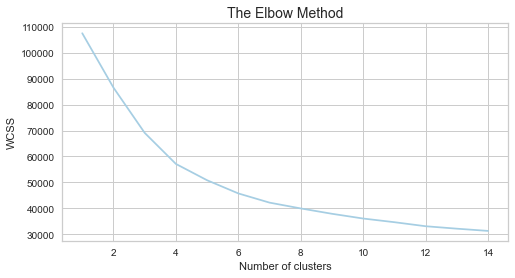

In [84]:
# At first let’s define number of cluster by Elbow method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = seed)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (8,4))
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method', fontsize=14)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the figure we can see that optimal number of cluster is about 4.

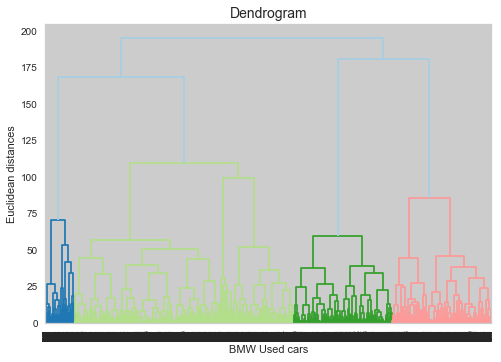

In [85]:
# Let's look at the dendrogram to confirm the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram', fontsize=14)
plt.xlabel('BMW Used cars')
plt.ylabel('Euclidean distances')
plt.show()

From checking the dendrogram we can confirm that assigning cars to 4 clusters makes sense.

In [86]:
# Predict ‘cluster’ feature with KMeans for X_ train and X_test 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = seed)
train_kmeans = kmeans.fit_predict(X_train)

# Add cluster to dataframe
X_train_df_cluster = X_train_df
X_train_df_cluster['cluster'] = train_kmeans

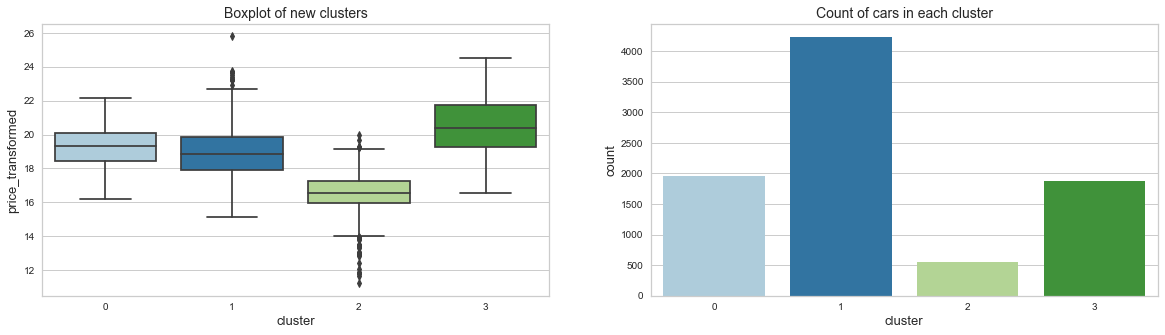

In [87]:
# Plot new 'cluster' feature
fig, axs = plt.subplots(ncols=2, figsize=(20,5))
sns.boxplot(x=X_train_df_cluster.cluster, y=y_train, ax=axs[0])
sns.countplot(X_train_df_cluster.cluster, ax=axs[1])
axs[0].set_title("Boxplot of new clusters", fontsize=14)
axs[1].set_title("Count of cars in each cluster", fontsize=14)
axs[0].set_xlabel('cluster', fontsize=13)
axs[0].set_ylabel('price_transformed', fontsize=13)
axs[1].set_xlabel('cluster', fontsize=13)
axs[1].set_ylabel('count', fontsize=13)
plt.show()

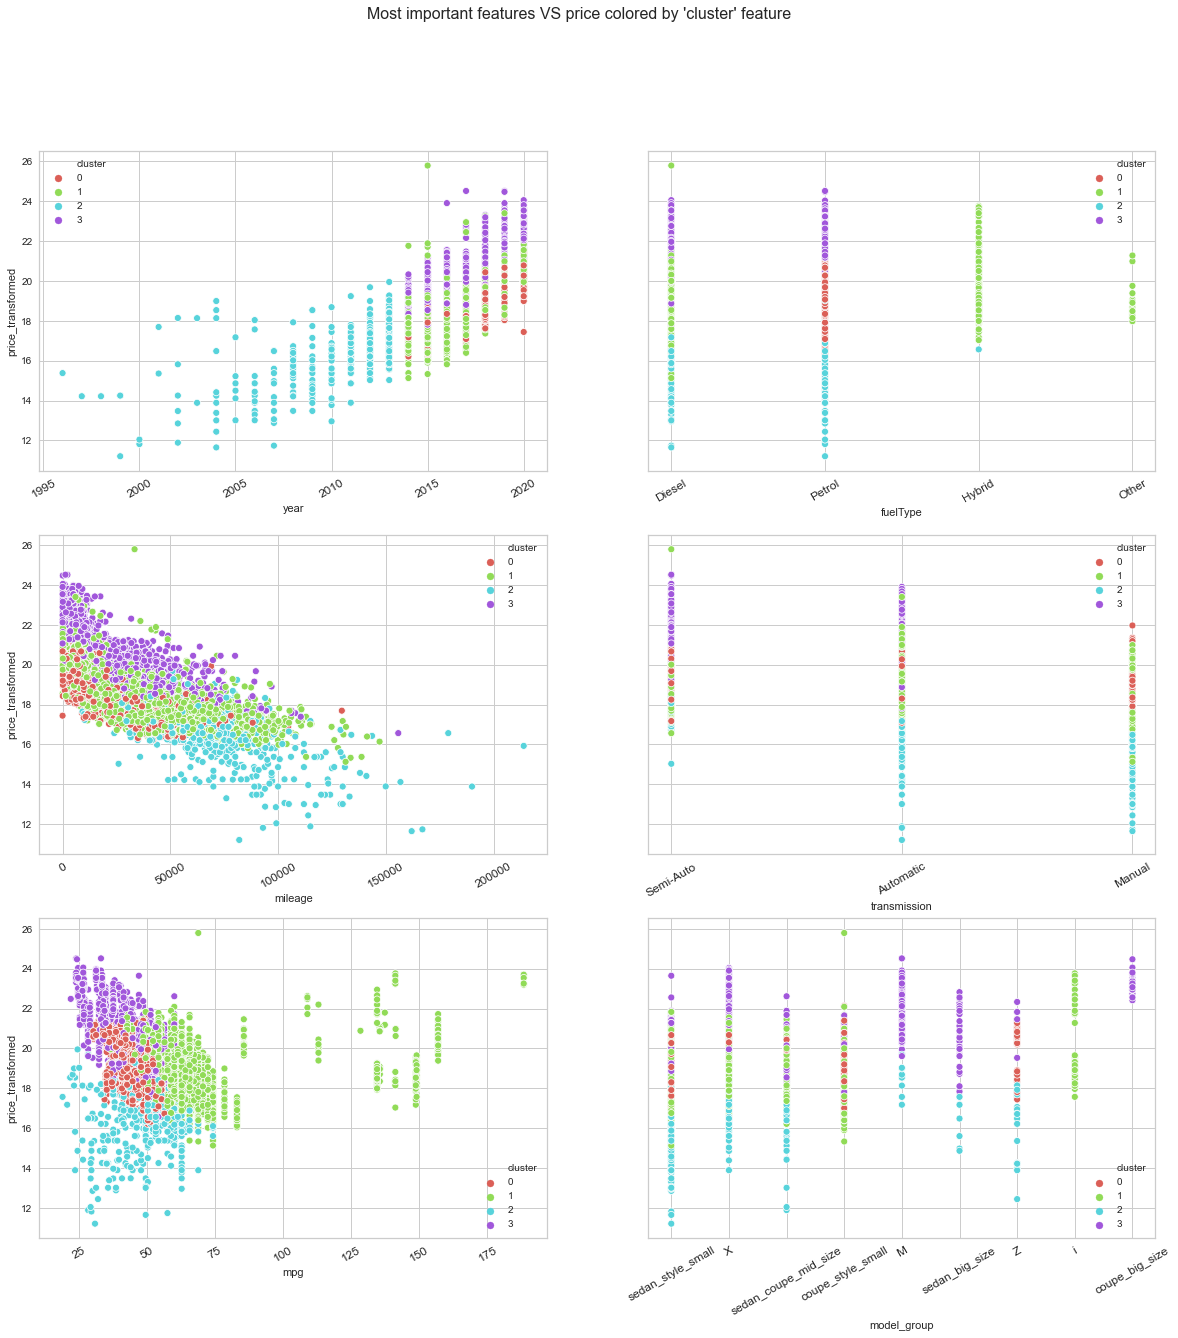

In [88]:
# Plot new 'cluster' feature with other most important features
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,20), sharey=True)
cmap = sns.color_palette("hls", 4)
sns.scatterplot(x='year', y = y_train, hue='cluster', data=X_train_df_cluster, palette=cmap, ax=axs[0, 0])
sns.scatterplot(x='mileage', y = y_train, hue='cluster', data=X_train_df_cluster, palette=cmap, ax=axs[1, 0])
sns.scatterplot(x='fuelType', y = y_train, hue='cluster', data=X_train_df_cluster, palette=cmap, ax=axs[0, 1])
sns.scatterplot(x='transmission', y = y_train, hue='cluster', data=X_train_df_cluster, palette=cmap, ax=axs[1, 1])
sns.scatterplot(x='mpg', y = y_train, hue='cluster', data=X_train_df_cluster, palette=cmap, ax=axs[2, 0])
sns.scatterplot(x='model_group', y = y_train, hue='cluster', data=X_train_df_cluster, palette=cmap, ax=axs[2, 1])
fig.suptitle("Most important features VS price colored by 'cluster' feature", fontsize=16)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=30, fontsize=12)
plt.show()

From reviewing the figures we can try to explain how algorithm assigned cars to clusters:
- cluster 0 are cars in middle price segment, low mileage, Petrol fuel type, mpg below average and produced after 2013;
- cluster 1 are cars in middle price segment, non-Petrol fuel type, mpg above average and produced after 2013;
- cluster 2 are cars with average/below average price that are older than 7 years;
- cluster 3 are cars in higher price segment, Diesel/Petrol fuel type, mpg below average and produced after 2013. Difference with cluster 0 is that majority of these cars belong to model groups `X`, `M`, middle and big models from `Series` line.

## Step 5. Test LinearRegression algorithm <a name="6.5"></a>

LinearRegression algorithm can be a good solution for task of price prediction, but it's important that input data is compliant with the assumptions of this algorithm. In our case a problem can be that not all features have linear correlation with the price and target variable contains outliers. 

Let's see how well LinearRegression model will perform. 

In [89]:
# Initiate Linear Regressor 
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

In [90]:
# Define a function to calculate metrics 
def calculate_metrics(y_pred, model, y=y_test):
    explained_variance = round(explained_variance_score(y, y_pred),4)
    MAE = round(mean_absolute_error(y, y_pred),4)
    RMSE = round(np.sqrt(mean_squared_error(y, y_pred)),4)
    MSLE = round(mean_squared_log_error(y, y_pred),6)
    print("Results of {} model: \n - explained_variance: {},".format(model, explained_variance))
    print(" - mean_absolute_error: {}, \n - root_mean_squared_error: {}, \n - mean_squared_log_error: {}."
                                                                                      .format(MAE, RMSE, MSLE))

In [91]:
# Calculate metrics
calculate_metrics(y_pred=y_pred_reg, model=reg, y=y_test)

Results of LinearRegression() model: 
 - explained_variance: 0.9367,
 - mean_absolute_error: 0.2935, 
 - root_mean_squared_error: 0.3937, 
 - mean_squared_log_error: 0.000388.


Explained_variance and root mean squared error were chosen as main metrics for the evaluation of model performance. RMSE was chosen because this metric penalizes big errors and it’s important to avoid big mistakes in price predictions.

Seems like we got pretty good results with LinearRegression, features describe 93.7% of variance in price variable. Let’s transform price feature in pounds, so it’s easier to interpret the results.

In [92]:
y_test_price = inv_boxcox(y_test, box_cox_tranform_coef)

In [93]:
def create_dataframe_with_predictions(model, X_test, box_cox_tranform_coef = box_cox_tranform_coef):
    """
Parameters expected by the function:
    - model – instance of model to apply to make predictions,
    - name_of_dataframe – defines the name of new dataframe that will be created, dataframe will contain X_test_df features, Real and Precited prices in absolute values. 
    - box_cox_tranform_coef - coefficient for price transformation, default value is variable box_cox_tranform_coef.
Function also prints statistics for '%error' column, calculates % of prices with error >25%, calculates and prints metrics of model performance: explained_variance, MAE, RMSE, MSLE
    """
    # Inverse BoxCox transformation for the price 
    y_pred_price_by_model = inv_boxcox(model.predict(X_test), box_cox_tranform_coef)
    # Create a table with real price, predicted price and features 
    dataframe = pd.concat([pd.DataFrame(y_test_price).reset_index(drop=True), 
                       pd.DataFrame(y_pred_price_by_model), 
                       X_test_df.reset_index(drop=True)], axis=1)
    dataframe.columns=['Real_price', 'Predicted_price']+[i for i in X_test_df.columns]
    dataframe['%error'] = abs(dataframe.Real_price - dataframe.Predicted_price)/dataframe.Real_price
    print('DataFrame with price predictions is created.')
    print('')
    print("Statistics for '%error' column:")
    display(dataframe['%error'].describe())
    print('There are {}% of predictions  with error > 25%.'
          .format(round(dataframe[dataframe['%error']>0.25]['%error'].count()/dataframe['%error'].count(),4)*100))
    print('')
    # Calculate  metrics
    calculate_metrics(y_pred=y_pred_price_by_model, model=model, y=y_test_price)
    return(dataframe)

In [94]:
predicted = create_dataframe_with_predictions(model=reg, X_test=X_test)

DataFrame with price predictions is created.

Statistics for '%error' column:


count    2157.000000
mean        0.089456
std         0.103612
min         0.000033
25%         0.034634
50%         0.071677
75%         0.123155
max         3.554616
Name: %error, dtype: float64

There are 3.34% of predictions  with error > 25%.

Results of LinearRegression() model: 
 - explained_variance: 0.9231,
 - mean_absolute_error: 2024.9603, 
 - root_mean_squared_error: 3182.5727, 
 - mean_squared_log_error: 0.014243.


Standard error of predictions in absolute values is 2024 pounds, on average the model is wrong about car price by 8.9% with 10% standard deviation of error. Let’s look at predictions where the model got biggest loss.

In [95]:
# Rows with error in predicted prices > 60%
predicted[predicted['%error']>0.6]

Real_price  Predicted_price     model  year transmission  mileage  \
482      99950.0     35228.599182        M4  2016    Automatic      771   
1197      3076.0     14009.998227        Z4  2014       Manual    31074   
1253      2995.0      5327.715356  3 Series  2010       Manual   101104   

     fuelType  tax   mpg  engineSize engine_category        model_group  \
482    Petrol  300  33.2         3.0      big_engine                  M   
1197   Petrol  205  41.5         2.0   medium_engine                  Z   
1253   Petrol  165  44.8         2.0   medium_engine  sedan_style_small   

      model_series  _big_engine_auto_semi_auto  _not_old_car  mpg_1  mpg_2  \
482              4                           1             1   33.2    0.0   
1197             4                           0             1   41.5    0.0   
1253             3                           0             0   44.8    0.0   

        %error  
482   0.647538  
1197  3.554616  
1253  0.778870

In [96]:
# Let’s explore cars with similar characterizes to the ones price for which were predicted with the highest errors
display(data[(data.model.str.contains('M4'))&(data.year==2016)&(data.transmission=='Automatic')])
display(data[(data.model.str.contains('Z4'))&(data.year==2014)&(data.transmission=='Manual')])
display(data[(data.model.str.contains('3 Series'))&(data.year==2010)&(data.transmission=='Manual')&(data.fuelType=='Petrol')])

model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
3779    M4  2016  32983    Automatic    33113   Petrol  300  34.0         3.0   
5362    M4  2016  99950    Automatic      771   Petrol  300  33.2         3.0   
7394    M4  2016  76990    Automatic     4550   Petrol  300  33.2         3.0   
7572    M4  2016  39500    Automatic      800   Petrol  300  34.0         3.0   

     engine_category  price_transformed model_group  model_series  \
3779      big_engine          20.780492           M             4   
5362      big_engine          24.938421           M             4   
7394      big_engine          23.909009           M             4   
7572      big_engine          21.419445           M             4   

      _big_engine_auto_semi_auto  _not_old_car  mpg_1  mpg_2  
3779                           1             1   34.0    0.0  
5362                           1             1   33.2    0.0  
7394                           1             1   33.2    0.0  
7572                           1             1   34.0    0.0

model  year  price transmission  mileage fuelType  tax   mpg  \
953      Z4  2014  13498       Manual    22080   Petrol  205  41.5   
5537     Z4  2014   3076       Manual    31074   Petrol  205  41.5   
7600     Z4  2014  12490       Manual    31000   Petrol  200  41.5   
7700     Z4  2014  11990       Manual    36000   Petrol  200  41.5   
10000    Z4  2014  13200       Manual    37957   Petrol  200  41.5   

       engineSize engine_category  price_transformed model_group  \
953           2.0   medium_engine          17.811459           Z   
5537          2.0   medium_engine          13.548168           Z   
7600          2.0   medium_engine          17.568323           Z   
7700          2.0   medium_engine          17.441248           Z   
10000         2.0   medium_engine          17.741290           Z   

       model_series  _big_engine_auto_semi_auto  _not_old_car  mpg_1  mpg_2  
953               4                           0             1   41.5    0.0  
5537              4                           0             1   41.5    0.0  
7600              4                           0             1   41.5    0.0  
7700              4                           0             1   41.5    0.0  
10000             4                           0             1   41.5    0.0

model  year  price transmission  mileage fuelType  tax   mpg  \
9255   3 Series  2010   2995       Manual   101104   Petrol  165  44.8   
10239  3 Series  2010   5290       Manual    80000   Petrol  165  44.8   
10660  3 Series  2010   4995       Manual   119000   Petrol  160  44.8   

       engineSize engine_category  price_transformed        model_group  \
9255          2.0   medium_engine          13.478007  sedan_style_small   
10239         2.0   medium_engine          15.023645  sedan_style_small   
10660         2.0   medium_engine          14.862890  sedan_style_small   

       model_series  _big_engine_auto_semi_auto  _not_old_car  mpg_1  mpg_2  
9255              3                           0             0   44.8    0.0  
10239             3                           0             0   44.8    0.0  
10660             3                           0             0   44.8    0.0

After reviewing cars with the similar characteristics, it’s seems like predictions make sense. Prices for cars with wrong predictions differ significantly in comparison to similar cars, maybe we miss some information in collected data that can explain these variations. 

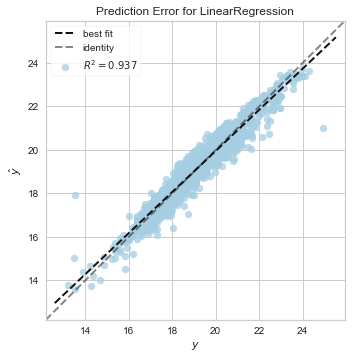

In [97]:
# Plot built LinearRegression model
visualizer = PredictionError(reg)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

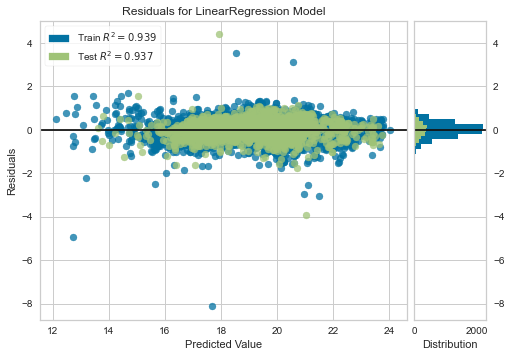

In [98]:
# Plot Residuals for LinearRegression model
visualizer = ResidualsPlot(reg)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

From the figures above it seems that linear model is appropriate for this dataset as errors in the residuals plot are scattered randomly without pattern. 

### 5.1 Train LinearRegressor without outliers in price and check results 

Since LinearRegression algorithm is sensitive to outliers, we will try to remove the most extreme observations with price above 90K, train the model and check the metrics.

In [99]:
train_df_without_outliers = train_df[train_df.price<90000]

# Separate features and target
y_train_without_outliers = train_df_without_outliers['price_transformed']
X_train_df_without_outliers = train_df_without_outliers.drop(['price', 'price_transformed'], axis=1)

# Standardize the data: StandardScaler for numerical features and OneHotEncoding for categorical features
X_train_num_without_outliers =  scaler.transform(X_train_df_without_outliers.select_dtypes(exclude='object'))
X_train_cat_without_outliers = encoder.transform(X_train_df_without_outliers.select_dtypes(include='object'))

# Combine preprocces features 
X_train_without_outliers = np.concatenate((X_train_num_without_outliers, X_train_cat_without_outliers.toarray()), axis=1)

In [100]:
reg_without_outliers = LinearRegression()
reg_without_outliers.fit(X_train_without_outliers, y_train_without_outliers)
predicted_reg_without_outliers = create_dataframe_with_predictions(model=reg_without_outliers, 
                                                                       X_test=X_test)

DataFrame with price predictions is created.

Statistics for '%error' column:


count    2157.000000
mean        0.089330
std         0.103597
min         0.000011
25%         0.034278
50%         0.071150
75%         0.122810
max         3.555093
Name: %error, dtype: float64

There are 3.34% of predictions  with error > 25%.

Results of LinearRegression() model: 
 - explained_variance: 0.9233,
 - mean_absolute_error: 2022.5007, 
 - root_mean_squared_error: 3180.0736, 
 - mean_squared_log_error: 0.014222.


Performance of LinearRegression model trained without extreme observations is slightly better, but difference is not significant.

Linear regression model seems to provide a decent fit to the data, but let’s explore if with other algorithms we can improve the results.

## Step 6. Test other regression algorithms <a name="6.6"></a>

In this section we will train models using algorithms described in item '3. Machine learning algorithms' and check the results.

In [101]:
# Initiate regression models
KNeighbors = KNeighborsRegressor(n_neighbors=3)
SGD = SGDRegressor(random_state = seed)
GBR = GradientBoostingRegressor(random_state = seed)
elasticNet = ElasticNetCV(random_state = seed)
DecisionTree = DecisionTreeRegressor(random_state = seed)
RandomForest = RandomForestRegressor(n_estimators = 10, random_state = seed)
SVR_reg = SVR(kernel = 'rbf')
AdaBoost = AdaBoostRegressor(random_state = seed)
XGBR = XGBRegressor(random_state = seed)
lgb_reg = lgb.LGBMRegressor(random_state = seed)
cat_reg = cat.CatBoostRegressor(random_state = seed, loss_function='RMSE', silent=True)

models=[SGD, elasticNet, KNeighbors, SVR_reg, DecisionTree, RandomForest, GBR, AdaBoost, XGBR, lgb_reg, cat_reg]

In [102]:
# Fit Regressors and print performance results 
for i in models:
    i.fit(X_train, y_train)
    y_pred_reg = i.predict(X_test)
    calculate_metrics(y_pred=y_pred_reg, model=i, y=y_test)
    print('')

Results of SGDRegressor(random_state=1) model: 
 - explained_variance: 0.9005,
 - mean_absolute_error: 0.3444, 
 - root_mean_squared_error: 0.4938, 
 - mean_squared_log_error: 0.000607.

Results of ElasticNetCV(random_state=1) model: 
 - explained_variance: 0.9316,
 - mean_absolute_error: 0.3018, 
 - root_mean_squared_error: 0.4093, 
 - mean_squared_log_error: 0.000418.

Results of KNeighborsRegressor(n_neighbors=3) model: 
 - explained_variance: 0.945,
 - mean_absolute_error: 0.2538, 
 - root_mean_squared_error: 0.3672, 
 - mean_squared_log_error: 0.000348.

Results of SVR() model: 
 - explained_variance: 0.9494,
 - mean_absolute_error: 0.2443, 
 - root_mean_squared_error: 0.3523, 
 - mean_squared_log_error: 0.000315.

Results of DecisionTreeRegressor(random_state=1) model: 
 - explained_variance: 0.9298,
 - mean_absolute_error: 0.2836, 
 - root_mean_squared_error: 0.4146, 
 - mean_squared_log_error: 0.000444.

Results of RandomForestRegressor(n_estimators=10, random_state=1) model: 


From the results we can see that CatBoost and XGBoost algorithms have the best performance.
Since CatBoostRegressor has the lowest loss, we will explore it in more detail. CatBoost is a relatively new open-source machine learning algorithm that was built upon the theory of decision trees and gradient boosting. What is interesting about it is that it also accepts input data with minimal preprocessing: categorical features can be not encoded (it's possible to pass text as input) and scaling for numerical features is also not required.

Let’s transform price to pounds and look at results in absolute values for the best performing algorithm CatBoost.

In [103]:
# Calculate  metrics on training set
predicted_train = cat_reg.predict(X_train)
calculate_metrics(y_pred=predicted_train, model=cat_reg, y=y_train)

Results of <catboost.core.CatBoostRegressor object at 0x000001EA1D40AFA0> model: 
 - explained_variance: 0.9761,
 - mean_absolute_error: 0.1812, 
 - root_mean_squared_error: 0.2468, 
 - mean_squared_log_error: 0.000149.


From the metrics we can see that loss calculated on the training set is slightly smaller than loss on the test set. The difference is not significant, so looks like the model does not overfit. 

In [104]:
predicted_cat_reg=create_dataframe_with_predictions(model=cat_reg, X_test=X_test)

DataFrame with price predictions is created.

Statistics for '%error' column:


count    2157.000000
mean        0.066130
std         0.093839
min         0.000017
25%         0.022368
50%         0.049512
75%         0.090587
max         3.479855
Name: %error, dtype: float64

There are 1.48% of predictions  with error > 25%.

Results of <catboost.core.CatBoostRegressor object at 0x000001EA1D40AFA0> model: 
 - explained_variance: 0.9611,
 - mean_absolute_error: 1448.8614, 
 - root_mean_squared_error: 2262.3362, 
 - mean_squared_log_error: 0.00859.


In [105]:
# Rows with error in predicted prices > 60%
predicted_cat_reg[predicted_cat_reg['%error']>0.6]

Real_price  Predicted_price model  year transmission  mileage fuelType  \
1197      3076.0     13780.034358    Z4  2014       Manual    31074   Petrol   

      tax   mpg  engineSize engine_category model_group  model_series  \
1197  205  41.5         2.0   medium_engine           Z             4   

      _big_engine_auto_semi_auto  _not_old_car  mpg_1  mpg_2    %error  
1197                           0             1   41.5    0.0  3.479855

By using CatBoostRegressor we were able to improve RMSE from 3180 to 2262 pounds.

MAE is also improved from 2022 pounds to 1449 pounds.

But there is still one prediction with predicted price almost 3.5 times higher than real price for `Z4` model and about 1.5% of predictions have error more than 25%.

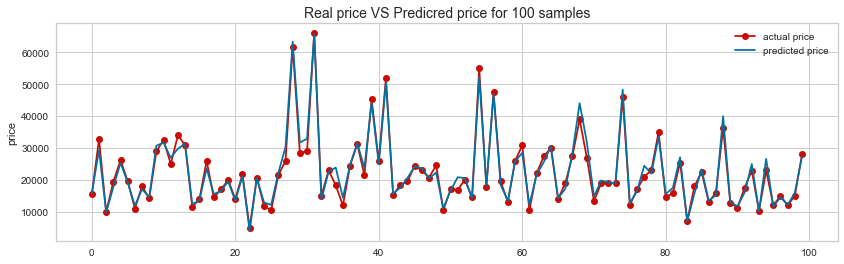

In [106]:
# Compare real VS predicted by CatBoostRegressor prices
plt.figure(figsize = (14,4))
random_state = np.random.RandomState(1234)
num_samples=100
idx=random_state.choice(np.arange(predicted_cat_reg.shape[0]), num_samples)
plt.plot(np.arange(num_samples), predicted_cat_reg.Real_price[idx],'ro-')
plt.plot(np.arange(num_samples), predicted_cat_reg.Predicted_price[idx],'bx-')
plt.ylabel("price")
plt.legend(["actual price",'predicted price','mean price'])
plt.title('Real price VS Predicred price for 100 samples', fontsize=14)
plt.show()

Predictions on the chosen sample (100 records) looks good, shapes of actual price and predictions are the same.

## Step 7. Tune model based on CatBoostRegression algorithm <a name="6.7"></a>

### 7.1 Train CatBoostRegressor using target without transformation 

Since decision trees algorithm is robust toward outliers, let’s conduct an experiment – we will try to use real, not transformed, values of `price`.

In [107]:
# Redefine target dataset
y_train = train_df['price']
y_test = test_df['price']

cat_reg_without_transformation = cat.CatBoostRegressor(random_state = seed, loss_function='RMSE', silent=True)
cat_reg_without_transformation.fit(X_train, y_train)

In [108]:
predicted_cat_reg_without_transformation = create_dataframe_with_predictions(model=cat_reg_without_transformation, 
                                                                       X_test=X_test, box_cox_tranform_coef=1)

DataFrame with price predictions is created.

Statistics for '%error' column:


count    2157.000000
mean        0.068071
std         0.097646
min         0.000014
25%         0.023303
50%         0.051011
75%         0.090604
max         3.478340
Name: %error, dtype: float64

There are 1.34% of predictions  with error > 25%.

Results of <catboost.core.CatBoostRegressor object at 0x000001EA1C404E20> model: 
 - explained_variance: 0.9622,
 - mean_absolute_error: 1473.3656, 
 - root_mean_squared_error: 2230.2604, 
 - mean_squared_log_error: 0.00902.


The results show that the main metrics (explained variance and root mean squared error) are improved, but MAE/MSLE became worse. That means that new version of the model makes less big mistakes, but on average is less accurate with prediction in relative terms. Since we defined that big mistakes should be avoided, we will keep the changes and from now on will use this version of model. 

### 7.2 Fine-tune hyperparameters for the CatBoostRegressor

Let’s see if we can improve model performance with hyper-parameter tuning.

In this project we will use RandomizedSearchCV, as it less computationally expensive than GridSearchCV and allows to check wider range of parameters. Disadvantage of this method is that search of best parameters is not exhaustive and the best combination can be skipped.

We will explore the most common hyperparameters:
- number of iterations (iterations) - the maximum number of trees that can be built, defines how complex a model can be, a higher number of trees gives better performance, but model training takes more time.
- learning rate (learning_rate) - used for reducing the gradient step. It affects the overall time of training: the smaller the value, the more iterations are required for training. Increasing the learning rate can decrease overfitting, but also can cause a model to converge too quickly to a suboptimal solution.
- tree depth (depth) – setting depth of trees.
- reg_lambda – L2 regularization parameter on the weights, can be increased to  reduce the likelihood of overfitting.
- random strength - the amount of randomness to use for scoring splits when a tree structure is selected, can be used to avoid overfitting a model.

In [108]:
# Create custom scorer for tracking by RandomizedSearchCV - mean_squared_error
scorer = make_scorer(mean_squared_error, greater_is_better = False)

# Set parameter grid
parameters = {'depth'         : [6, 7, 8, 9, 10, 11],
              'learning_rate' : [0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17],
              'iterations'    : [900, 1000, 1100, 1200, 1300, 1400, 1500],
                'reg_lambda': [0.1, 1.0, 3.0, 5.0, 10.0, 15.0, 20.0, 25.0],
               'random_strength': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
                 }

# Search for optimal parameters
grid_search = RandomizedSearchCV(estimator = cat_reg_without_transformation,
                           param_distributions = parameters,
                           scoring = scorer,
                           cv = 5,
                           n_iter=30,
                           verbose=1,random_state=seed)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 24.8min finished


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000277840BA460>,
                   n_iter=30,
                   param_distributions={'depth': [6, 7, 8, 9, 10, 11],
                                        'iterations': [900, 1000, 1100, 1200,
                                                       1300, 1400, 1500],
                                        'learning_rate': [0.06, 0.07, 0.08,
                                                          0.09, 0.1, 0.11, 0.12,
                                                          0.13, 0.14, 0.15,
                                                          0.16, 0.17],
                                        'random_strength': [0.25, 0.5, 0.75, 1,
                                                            1.25, 1.5, 1.75,
                                                            2],
                                        'reg_lambda': [0.1, 1.0, 3.0, 5.0, 10.0,
                       

In [109]:
# Save best parameters into a variable
best_params = grid_search.best_params_
print(best_params)

{'reg_lambda': 15.0, 'random_strength': 0.25, 'learning_rate': 0.08, 'iterations': 1200, 'depth': 7}


In [110]:
cat_reg_tuned = cat.CatBoostRegressor(**best_params, random_state = seed, loss_function='RMSE', silent=True)
cat_reg_tuned.fit(X_train, y_train)

In [111]:
# Check model performance 
predicted_cat_reg_tuned = create_dataframe_with_predictions(model=cat_reg_tuned,
                                                                       X_test=X_test, box_cox_tranform_coef=1)

DataFrame with price predictions is created.

Statistics for '%error' column:


count    2157.000000
mean        0.067991
std         0.093474
min         0.000004
25%         0.023328
50%         0.051962
75%         0.091377
max         3.410061
Name: %error, dtype: float64

There are 1.58% of predictions  with error > 25%.

Results of <catboost.core.CatBoostRegressor object at 0x000001EA1D3E3A60> model: 
 - explained_variance: 0.9631,
 - mean_absolute_error: 1474.6109, 
 - root_mean_squared_error: 2203.6443, 
 - mean_squared_log_error: 0.008743.


As a result of fine-tuning of the model's hyperparameters the main metrics - explained variance and root mean squared error - have slightly improved and in the same time MAE haven't increased.

### 7.3 Feature selection 

During reviewing correlation matrices on the features exploration step, we saw that some features have very little or no correlation with the price.
Let’s analyze if it’s possible to reduce the number of features as it reduces computational cost of modeling and can even improve the performance of the model.

In [112]:
# Add dataframe Xtrain_preprocessed with features names
object_features = [i for i in X_train_df.select_dtypes(exclude='object').columns][:-1]
numeric_features = [i for i in encoder.get_feature_names(X_train_df.select_dtypes(include='object').columns)]
features_names = object_features + numeric_features
Xtrain_preprocessed = pd.DataFrame(X_train, columns=features_names)

#### 7.3.1 Calculate scores using univariate selection methods

As the first step let’s calculate Pearson’s Correlation Coefficient - a measure of linear correlation between each feature and price.

In [113]:
# Define and apply feature selector using Pearson’s Correlation Coefficient
fs_selector = SelectKBest(score_func=f_regression, k=X_train.shape[1])
fs_selector.fit_transform(X_train, y_train)

# Crate DataFrame with features scores
features_score = pd.DataFrame(zip(features_names, fs_selector.scores_), 
                              columns=['param_name','param_value_f_regression']).sort_values('param_value_f_regression')

In [114]:
print('Top10 the most important features by Pearson’s Correlation Coefficient:')
display(features_score.nlargest(10, 'param_value_f_regression'))

print('Top10 the least important features by  Pearson’s Correlation Coefficient:')
display(features_score.nsmallest(10, 'param_value_f_regression'))

Top10 the most important features by Pearson’s Correlation Coefficient:


param_name  param_value_f_regression
0                            year               5463.402048
1                         mileage               5029.768357
5                    model_series               2384.603871
6      _big_engine_auto_semi_auto               2248.697896
4                      engineSize               2210.089009
33            transmission_Manual               1562.087332
34         transmission_Semi-Auto               1228.680172
48  model_group_sedan_style_small               1119.753137
41                  model_group_X               1027.349978
26                       model_X5                971.871725

Top10 the least important features by  Pearson’s Correlation Coefficient:


param_name  param_value_f_regression
47  model_group_sedan_coupe_mid_size                  0.034287
13                    model_5 Series                  0.231634
14                    model_6 Series                  0.742558
12                    model_4 Series                  1.082266
31                          model_i3                  4.199699
36                    fuelType_Other                  4.574051
8                              mpg_1                  5.260189
21                          model_M6                  5.399897
42                     model_group_Z                  6.677674
18                          model_M3                 10.810566

Seems like many variables that define to which model a car belongs doesn’t correlate with price much. The same situation we saw in the correlation matrix: some variables of car models had high correlation with the price, but for others correlation was equal to zero.

As for features that correlate with the price the most – no surprises, it’s the same coefficients that we saw during the second step. Also added variable `_big_engine_auto_semi_auto` got in the list of top10 features with highest correlation coefficients. 


To continue exploration what features are useful to predict price, let’s calculate `mutual_info_regression` metric.
`mutual_info_regression` measures how much given feature has information about a target variable and it can be useful to gain some understanding how good each feature is. This metric is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [115]:
# Define and apply feature selector using mutual_info_regression 
def mutual_info(X, y):
    return mutual_info_regression(X, y, random_state=seed)
reg_selector = SelectKBest(score_func=mutual_info, k=X_train.shape[1])
reg_selector.fit_transform(X_train, y_train)
# Add results to features scores DataFrame
features_score['param_value_mutual_info_regression'] = reg_selector.scores_

In [116]:
print('Top10 the most important features by mutual_info_regression metric:')
display(features_score.nlargest(10, 'param_value_mutual_info_regression'))

print('Top10 the least important features by mutual_info_regression metric:')
display(features_score.nsmallest(10, 'param_value_mutual_info_regression'))

Top10 the most important features by mutual_info_regression metric:


param_name  param_value_f_regression  \
47  model_group_sedan_coupe_mid_size                  0.034287   
12                    model_4 Series                  1.082266   
13                    model_5 Series                  0.231634   
18                          model_M3                 10.810566   
14                    model_6 Series                  0.742558   
42                     model_group_Z                  6.677674   
36                    fuelType_Other                  4.574051   
31                          model_i3                  4.199699   
2                                tax                575.991592   
40      engine_category_small_engine                493.545345   

    param_value_mutual_info_regression  
47                            0.594985  
12                            0.566697  
13                            0.553254  
18                            0.418348  
14                            0.386184  
42                            0.279582  
36                            0.224153  
31                            0.215918  
2                             0.160887  
40                            0.141385

Top10 the least important features by mutual_info_regression metric:


param_name  param_value_f_regression  \
24                       model_X3                 98.574445   
44  model_group_coupe_style_small                 62.679084   
22                       model_X1                 45.750474   
9                           mpg_2                601.865075   
28                       model_X7                802.967036   
7                    _not_old_car                893.123065   
23                       model_X2                 62.816207   
37                fuelType_Petrol                 86.426641   
6      _big_engine_auto_semi_auto               2248.697896   
39  engine_category_medium_engine                461.226114   

    param_value_mutual_info_regression  
24                            0.000000  
44                            0.000186  
22                            0.000235  
9                             0.001625  
28                            0.002877  
7                             0.003400  
23                            0.003472  
37                            0.004258  
6                             0.004934  
39                            0.006290

As for the least important features results are similar: variables that define relation of cars to some models and model groups do no not have much information about target. Interestingly, the added feature `_big_engine_auto_semi_auto` got in the list of the least important features, however according to Pearson’s Correlation Coefficient it was one on the most important features. Also, it was not expected that `fuelType_Petrol` is not important feature as during exploration stage it seemed that it should affect the price. 

The list of features that explain the target the most looks really unexpected, it doesn't contain highly correlated features as `year` and `mileage`, but contains features that didn't correlate with price like `model_group_sedan_coupe_mid_size`, `fuelType_Other`, `model_M3`,`model_i3`.

#### 7.3.2 Review feature importance score calculated by CatBoostRegressor

One of the attributes of CatBoostRegressor is `feature_importances_` allows to get the individual importance values for each of the input features. As in our project we have non-ranking loss function, `PredictionValuesChange` method will be used for scores calculation.

**Short description of `PredictionValuesChange` metric:**

For each feature, `PredictionValuesChange` shows how much on average the prediction changes if the feature value changes. The bigger the value of the importance the bigger on average is the change to the prediction value if this feature is changed.

*Pros*: It is cheap to compute as you don’t have to do multiple training or testing and you will not be storing any extra information. You will get normalized values as the output (all the importances will add up to 100).

*Cons*: It may give misleading results for ranking objectives, it might put groupwise features into the top, even though they have a little influence on the resulting loss value. (Ref. 16)

In [117]:
features_score['param_value_cat_reg_importance'] = pd.DataFrame(cat_reg_tuned.feature_importances_)
print('Top15 the most important features y CatBoostRegressor score:')
display(features_score.nlargest(15, 'param_value_cat_reg_importance'))

print('Top15 the least important features by CatBoostRegressor score:')
display(features_score.nsmallest(15, 'param_value_cat_reg_importance'))

Top15 the most important features y CatBoostRegressor score:


param_name  param_value_f_regression  \
0                               year               5463.402048   
1                            mileage               5029.768357   
5                       model_series               2384.603871   
3                                mpg                822.198699   
41                     model_group_X               1027.349978   
4                         engineSize               2210.089009   
6         _big_engine_auto_semi_auto               2248.697896   
8                              mpg_1                  5.260189   
9                              mpg_2                601.865075   
33               transmission_Manual               1562.087332   
47  model_group_sedan_coupe_mid_size                  0.034287   
7                       _not_old_car                893.123065   
39     engine_category_medium_engine                461.226114   
44     model_group_coupe_style_small                 62.679084   
40      engine_category_small_engine                493.545345   

    param_value_mutual_info_regression  param_value_cat_reg_importance  
0                             0.094010                       31.665432  
1                             0.026078                       17.461528  
5                             0.012342                       13.753945  
3                             0.038080                        9.813985  
41                            0.076669                        6.068790  
4                             0.058684                        4.917630  
6                             0.004934                        3.729013  
8                             0.126520                        2.069943  
9                             0.001625                        1.951329  
33                            0.019066                        1.518419  
47                            0.594985                        1.028710  
7                             0.003400                        0.787512  
39                            0.006290                        0.766465  
44                            0.000186                        0.652069  
40                            0.141385                        0.607548

Top15 the least important features by CatBoostRegressor score:


param_name  param_value_f_regression  \
31                       model_i3                  4.199699   
29                       model_Z3                 12.699497   
38  engine_category_electric_line                 18.721239   
45                  model_group_i                 18.721239   
21                       model_M6                  5.399897   
36                 fuelType_Other                  4.574051   
43     model_group_coupe_big_size                418.609845   
42                  model_group_Z                  6.677674   
35                fuelType_Hybrid                 52.183054   
37                fuelType_Petrol                 86.426641   
16                 model_8 Series                418.609845   
15                 model_7 Series                101.500209   
14                 model_6 Series                  0.742558   
12                 model_4 Series                  1.082266   
27                       model_X6                290.986247   

    param_value_mutual_info_regression  param_value_cat_reg_importance  
31                            0.215918                        0.000000  
29                            0.047360                        0.000033  
38                            0.022018                        0.000036  
45                            0.027061                        0.000040  
21                            0.116680                        0.001217  
36                            0.224153                        0.001477  
43                            0.009840                        0.001642  
42                            0.279582                        0.002266  
35                            0.012061                        0.004748  
37                            0.004258                        0.006925  
16                            0.007658                        0.007138  
15                            0.020774                        0.007390  
14                            0.386184                        0.009225  
12                            0.566697                        0.010716  
27                            0.029877                        0.011411

In general results of feature importance scores by CatBoostRegressor are as expected: `year`, `mileage`, `engineSize` and `mpg` parameters impact price significantly as well as relation of a car to specific transmission type and models/model groups.

On the other hand, some model groups variables do not help to predict a car price. What was unexpected is that all three `fuelType` features will be in the list as not important, because on features exploration stage it looked like these should be useful features. Possibly the same information about target is contained in the other features.

#### 7.3.3 Search for optimal number of features using recursive feature elimination (RFE)

To define which features we can drop and which features are the most relevant it is suggested to use Recursive Feature Elimination.

Cutting off irrelevant features can allow algorithms to run more efficiently and even improve performance as some algorithms can be misled by irrelevant input features.

Even though the chosen algorithm CatBoost is based on decision trees theory and should be robust towards excessive input features due to process of random sampling of features subsets during training, it’s worth exploring if we can reduce number of features.

RFE is a wrapper-type feature that works by fitting the given machine learning algorithm, ranking features by importance, discarding the least important features and re-fitting the model. This process is repeated until a specified number of features remains. Advantage of such approach is that features importance can change after removing certain feature, so recursive refitting allows to define the least important feature on each step of the process. 

In [138]:
# Exhaustive search for the best number of features by testing model performance for each case from 6 to 54 features
number_features_RMSE= {}
for i in np.arange(49, 2, -1):
    rfe = RFE(grid_search.best_estimator_, n_features_to_select = i)
    X_train_selected = rfe.fit_transform(X_train, y_train)
    X_test_selected = rfe.transform(X_test)
    cat_reg_new=cat.CatBoostRegressor(**grid_search.best_params_, random_state = seed,  loss_function = 'RMSE', silent = True)
    cat_reg_new.fit(X_train_selected, y_train)
    y_pred_selected = cat_reg_new.predict(X_test_selected)
    number_features_RMSE[i] = round(np.sqrt(mean_squared_error(y_test, y_pred_selected)),4)

In [176]:
display(number_features_RMSE)
print('The loss is the smallest when there is {} features: {}.'.format(min(number_features_RMSE, key=number_features_RMSE.get),
                                                                       min(number_features_RMSE.values())))

{49: 2203.621,
 48: 2210.2714,
 47: 2202.3861,
 46: 2209.6082,
 45: 2208.9767,
 44: 2207.1799,
 43: 2204.3771,
 42: 2215.113,
 41: 2216.4895,
 40: 2193.7183,
 39: 2211.0473,
 38: 2212.3391,
 37: 2188.7372,
 36: 2194.4977,
 35: 2205.1748,
 34: 2212.7998,
 33: 2210.3322,
 32: 2200.9703,
 31: 2185.6738,
 30: 2224.411,
 29: 2202.0456,
 28: 2214.6278,
 27: 2237.011,
 26: 2246.2223,
 25: 2242.0457,
 24: 2234.5869,
 23: 2217.4552,
 22: 2230.7443,
 21: 2253.4991,
 20: 2261.212,
 19: 2239.2456,
 18: 2256.8939,
 17: 2235.532,
 16: 2241.0816,
 15: 2282.6389,
 14: 2237.9469,
 13: 2254.9062,
 12: 2269.2808,
 11: 2261.9485,
 10: 2317.1765,
 9: 2320.3677,
 8: 2317.2578,
 7: 2370.7369,
 6: 2401.3142,
 5: 2684.2483,
 4: 2890.0836,
 3: 3062.4359}

The loss is the smallest when there is 31 features: 2185.6738.


The results of exhaustive search for the best number of features shows that loss is the smallest for the number of features = 31. 

What is also worth mentioning is that we can significantly reduce number of features up to 8 features without losing much in model performance (loss increases from 2185 to 2317).

In [118]:
# Check results in absolute values for model trained on 8 features
rfe_8 = RFE(cat_reg_tuned, n_features_to_select = 8)
X_train_selected_8 = rfe_8.fit_transform(X_train, y_train)
X_test_selected_8 = rfe_8.transform(X_test)
cat_reg_selected_8=cat.CatBoostRegressor(**best_params, random_state = seed,  loss_function = 'RMSE', silent = True)
cat_reg_selected_8.fit(X_train_selected_8, y_train)
predicted_cat_reg_reduced_features_8 = create_dataframe_with_predictions(cat_reg_selected_8, 
                                                                         X_test=X_test_selected_8, box_cox_tranform_coef=1)

DataFrame with price predictions is created.

Statistics for '%error' column:


count    2157.000000
mean        0.074057
std         0.104046
min         0.000042
25%         0.024901
50%         0.057751
75%         0.098462
max         3.762465
Name: %error, dtype: float64

There are 2.23% of predictions  with error > 25%.

Results of <catboost.core.CatBoostRegressor object at 0x000001EA1A90B9D0> model: 
 - explained_variance: 0.9592,
 - mean_absolute_error: 1564.3827, 
 - root_mean_squared_error: 2317.2857, 
 - mean_squared_log_error: 0.010407.


The results for the model trained only on 8 features are worse than for the model trained on 31 features, but is still pretty good, 95.92% of price variance is explained by only 8 features!

#### 7.3.4 Explore 8 the most important features selected by RFE 

The great feature of Cat Boost model is the extensive possibilities to interpret the results and feature importance. For instance, we can excess features contributions and see on our data each feature contribution to the prediction.

Let’s see what 8 features were selected and explore contribution of each of them on the example of train set. 

In [119]:
# Print selected features names
selected_features = pd.DataFrame(X_train, columns=features_names).iloc[:, rfe_8.support_]
print('Selected features:')
for num, i in enumerate(selected_features.columns):
    print("Feature {}: {}".format(num, i))

Selected features:
Feature 0: year
Feature 1: mileage
Feature 2: mpg
Feature 3: engineSize
Feature 4: model_series
Feature 5: _big_engine_auto_semi_auto
Feature 6: mpg_2
Feature 7: model_group_X


In [120]:
# Define DataFrame with features contributions
features_contribution = cat_reg_selected_8.get_feature_importance(data=catboost.Pool(X_train_selected_8),
                                                         fstr_type='ShapValues',
                                                         prettified=True).iloc[:, :-1]
features_contribution.columns=[selected_features.columns]

In [121]:
print('Features contribution data:')
display(features_contribution.head(3))

Features contribution data:


year      mileage          mpg   engineSize model_series  \
0 -2331.584700  -926.814859 -1655.106463   570.187303  -315.363848   
1  3442.220798  2583.590786   482.791100 -2414.710152 -3656.063921   
2  3027.722895  2750.765836  7136.822793  -987.318669   552.880733   

  _big_engine_auto_semi_auto       mpg_2 model_group_X  
0                1250.862528   95.300428  -1052.490634  
1                -579.584821  107.115615   2977.991456  
2               -4046.770624  -65.399922   2599.362732

In [122]:
print('Train set data:')
display(train_df.head(3))

Train set data:


model  year  price transmission  mileage fuelType  tax   mpg  \
566   3 Series  2016  17498    Semi-Auto    27146   Diesel  150  56.5   
2681        X1  2019  25450    Semi-Auto     5021   Petrol  145  40.9   
5686        X3  2019  34882    Semi-Auto     6000   Petrol  145  30.4   

      engineSize engine_category  price_transformed        model_group  \
566          3.0      big_engine          18.641252  sedan_style_small   
2681         1.5    small_engine          19.885709                  X   
5686         2.0   medium_engine          20.977377                  X   

      model_series  _big_engine_auto_semi_auto  _not_old_car  mpg_1  mpg_2  
566              3                           1             1    0.0   56.5  
2681             1                           0             1   40.9    0.0  
5686             3                           0             1   30.4    0.0

Let’s compare how different features impact the price by checking first two observations:
-	`Year` value 2016 negatively affect the base price, while value 2019 adds to price.
-	`Mileage` value for second car is very low, so it has significant positive impact on price, while high mileage for the first observation affect the price negatively.
-	Interestingly, `mpg` for the first car is slightly higher and this value has significant negative impact on price. In the same time `mpg` for the second car does not differ much, but has positive affect, it’s possible that ‘good’ and ‘bad’ `mpg` for different models are different.
-	Small engine in the second observation has great negative contribution to the price, while relatively big engine for the first cat doesn’t affect the price a lot. 
- both cars relate to small model series line, so it affects price negatively.

Let’s calculate and plot a set of statistics for the chosen 8 the most important features.

The X-axis of the resulting chart contains values of the feature divided into buckets. For numerical features, the splits between buckets represent conditions from the trees of the model. For categorical features, each bucket stands for a category.

The Y-axis of the resulting chart contains the following graphs:
-	Average target value in the bucket (value transformed with Box-Cox transformation),
-	Average prediction in the bucket (value transformed with Box-Cox transformation),
-	Number of objects in the bucket.
-	Average predictions on varying values of the feature. It shows the contribution of each feature to the prediction by showing how prediction would have changed if feature is changed. 
    - To calculate it, the value of the feature is successively changed to fall into every bucket for every input object. The value for a bucket on the graph is calculated as the average for all objects when their feature values are changed to fall into this bucket.

In [123]:
# Get and display features importance score for 8 most important features
features_importance = pd.DataFrame(zip(selected_features.columns, 
                                       cat_reg_selected_8.get_feature_importance()), 
                                       columns=['param_name','importance_score']).sort_values('importance_score', 
                                                                                              ascending=False)
display(features_importance)

param_name  importance_score
0                        year         30.846364
4                model_series         17.044436
1                     mileage         16.674030
2                         mpg         11.969241
5  _big_engine_auto_semi_auto          7.885892
7               model_group_X          7.859437
3                  engineSize          4.364829
6                       mpg_2          3.355771

In [124]:
# Print features names
selected_features = pd.DataFrame(X_train, columns=features_names).iloc[:, rfe_8.support_]
print('Feature names:')
for num, i in enumerate(selected_features.columns):
    print("Feature {}: {}".format(num, i))

Feature names:
Feature 0: year
Feature 1: mileage
Feature 2: mpg
Feature 3: engineSize
Feature 4: model_series
Feature 5: _big_engine_auto_semi_auto
Feature 6: mpg_2
Feature 7: model_group_X


In [125]:
# Plot statistics for the chosen 8 the most important features
res = cat_reg_selected_8.calc_feature_statistics(selected_features,
                                    y_train,
                                    feature=None,
                                    plot=True)

For each feature, `PredictionValuesChange` shows how much on average the prediction changes if the feature value changes. The bigger the value of the importance - the bigger on average is the change to the prediction value if this feature is changed.

Figure shows that real and predicted values are very close. All plotted features have a significant impact on predicted price values: on all plots violet line (which represent mean prediction with substituted feature that is been explored) differs significantly from real/predicted values.

### 7.4 Explore predictions of best performing model using CatBoostRegressor algorithm

In [126]:
# Check results for model trained on 31 features
rfe_31 = RFE(cat_reg_tuned, n_features_to_select = 31)
X_train_selected_31 = rfe_31.fit_transform(X_train, y_train)
X_test_selected_31 = rfe_31.transform(X_test)
cat_reg_selected_31=cat.CatBoostRegressor(**best_params, random_state = seed,  loss_function = 'RMSE', silent = True)
cat_reg_selected_31.fit(X_train_selected_31, y_train)
predicted_cat_reg_reduced_features_31 = create_dataframe_with_predictions(model=cat_reg_selected_31, 
                                                                       X_test=X_test_selected_31, box_cox_tranform_coef=1)

DataFrame with price predictions is created.

Statistics for '%error' column:


count    2157.000000
mean        0.067629
std         0.094425
min         0.000091
25%         0.023570
50%         0.050883
75%         0.090654
max         3.493654
Name: %error, dtype: float64

There are 1.48% of predictions  with error > 25%.

Results of <catboost.core.CatBoostRegressor object at 0x000001EA1D3F44F0> model: 
 - explained_variance: 0.9637,
 - mean_absolute_error: 1465.2803, 
 - root_mean_squared_error: 2185.7003, 
 - mean_squared_log_error: 0.008636.


By reducing the number of features, we were able to improve target metrics - explained variance and root mean square error, as well as mean absolute error.

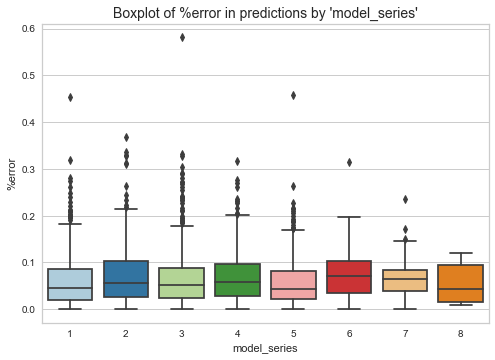

In [127]:
pred_without_outlier = predicted_cat_reg_reduced_features_31[predicted_cat_reg_reduced_features_31['%error']<3]
sns.boxplot(x='model_series', y = '%error', data = pred_without_outlier)
plt.title("Boxplot of %error in predictions by 'model_series'", fontsize=14)
plt.show()

From boxplot we can see that for all model series 75% of predictions have error about 10% or less, but there are many outliers in `%error` column. For 8 model series the interquartile range is the widest, but `%error` median is low and there are no outliers for this model line. The highest median of `%error` is for 6 model series.

In [128]:
print('{}% of predictions have error above 10% and {}% have error above 15%.'.format(
    round(predicted_cat_reg_reduced_features_31[predicted_cat_reg_reduced_features_31['%error']>0.10].Real_price.count()/
          predicted_cat_reg_reduced_features_31.Real_price.count(), 4)*100,
    round(predicted_cat_reg_reduced_features_31[predicted_cat_reg_reduced_features_31['%error']>0.15].Real_price.count()/
          predicted_cat_reg_reduced_features_31.Real_price.count(), 4)*100
))

21.42% of predictions have error above 10% and 8.76% have error above 15%.


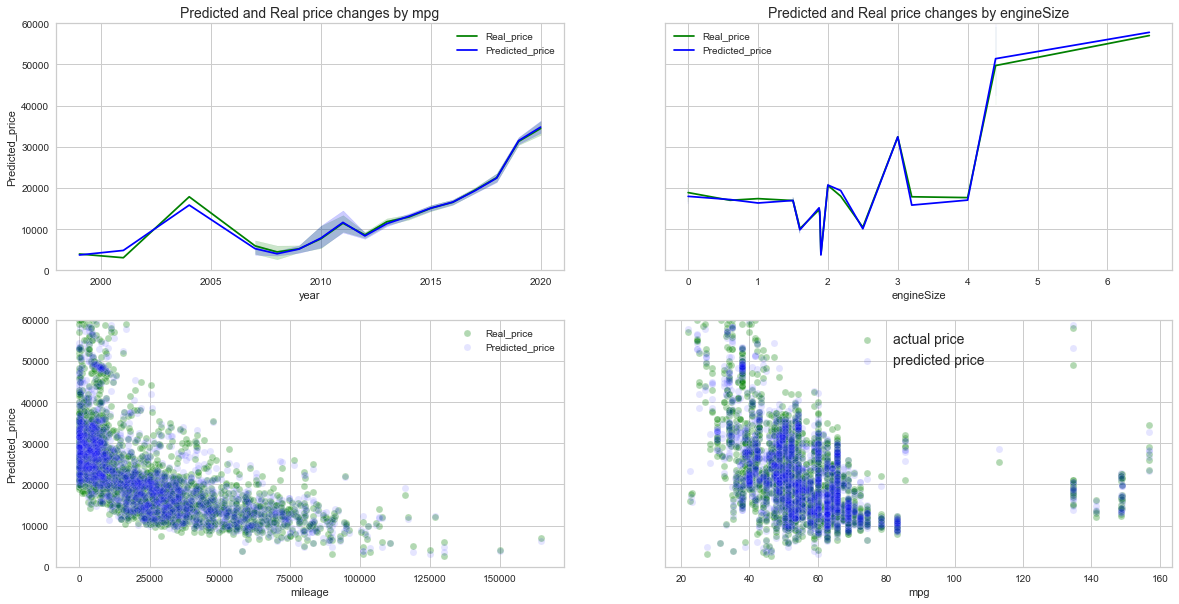

In [129]:
# Plot new '%error'  and predictions in context with other most important features
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharey=True)
sns.lineplot(x='year', y='Real_price', data = pred_without_outlier, color='green', ax=axs[0, 0], 
             label="Real_price")
sns.lineplot(x='year', y='Predicted_price', data = pred_without_outlier, color='blue', ax=axs[0, 0],
             label="Predicted_price")
sns.lineplot(x='engineSize', y='Real_price', data = pred_without_outlier, color='green',  ax=axs[0, 1], 
             label="Real_price")
sns.lineplot(x='engineSize', y='Predicted_price', data = pred_without_outlier, color='blue',  ax=axs[0, 1],
             label="Predicted_price")
sns.scatterplot(x='mileage', y='Real_price', data = pred_without_outlier, color='green', alpha=0.3, ax=axs[1, 0], 
                label="Real_price")
sns.scatterplot(x='mileage', y='Predicted_price', data = pred_without_outlier, color='blue', alpha=0.1, ax=axs[1, 0], 
                label="Predicted_price")
sns.scatterplot(x='mpg', y='Real_price', data = pred_without_outlier, color='green', alpha=0.3, ax=axs[1, 1], 
                label="Real_price")
sns.scatterplot(x='mpg', y='Predicted_price', data = pred_without_outlier, color='blue', alpha=0.1, ax=axs[1, 1], 
                label="Predicted_price")
axs[0, 0].set_ylim((0,60000))
axs[0, 1].set_ylim((0,60000))
axs[0, 0].set_title('Predicted and Real price changes by year', fontsize=14)
axs[0, 1].set_title('Predicted and Real price changes by engineSize', fontsize=14)
axs[0, 0].set_title('Predicted and Real price changes by mileage', fontsize=14)
axs[0, 0].set_title('Predicted and Real price changes by mpg', fontsize=14)
plt.legend(["actual price",'predicted price','mean price'], fontsize=14)
plt.show()

Figures show that there are deviations of predicted price from the real price for the older cars (approximately older than 2007), this can be connected to the fact that there is not much data for the older cars. As for figures with `mileage` and `mpg` features – seems like predictions are more conservative in comparison to real observations and algorithm does not catch some of the most extreme cases with very low or high features values.

## Step 8. Deep Learning. Predicting price using Keras <a name="6.8"></a>

Deep learning algorithms are the best choice for the complex tasks that require processing of large amounts of data, usually unstructured, such as image classification, natural language processing or speech recognition.

For the dataset in this project supervised machine learning algorithms are more suitable, but let’s try to build a deep learning version of car price predictor using Keras package with Tensorflow backend and see if can beat CatBoost algorithm. We will add a very simple model consisting of four Dense layers and Adam optimizer.

In [130]:
from keras.layers import Dense
from keras.models import Sequential
from keras import metrics
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [131]:
# Define model architecture 
def basic_model(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dense(64, activation="tanh"))
    t_model.add(Dense(24, activation="tanh"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

In [132]:
# Initiate a model and view summary
model = basic_model(X_train.shape[1], 1)
model.summary()

# Define number of epochs and batch_size
epochs = 250
batch_size = 256

# Add EarlyStopping to stop training in case there is no improvement in chosen metric during 20 epochs
keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, verbose=0)
]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5000      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 13,049
Trainable params: 13,049
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5000      
___________________________

In [133]:
# Fit the model
history = model.fit(X_train, train_df['price_transformed'],
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=0, # Change it to 2, if wished to observe execution
    validation_data=(X_test, test_df['price_transformed']),
    callbacks=keras_callbacks)

In [134]:
train_score = model.evaluate(X_train, train_df['price_transformed'])
valid_score = model.evaluate(X_test, test_df['price_transformed'])
print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

68/68 [==============================] - 0s 390us/step - loss: 0.1100 - mean_absolute_error: 0.2359
Train MAE:  0.2114 , Train Loss:  0.0873
Val MAE:  0.2359 , Val Loss:  0.11


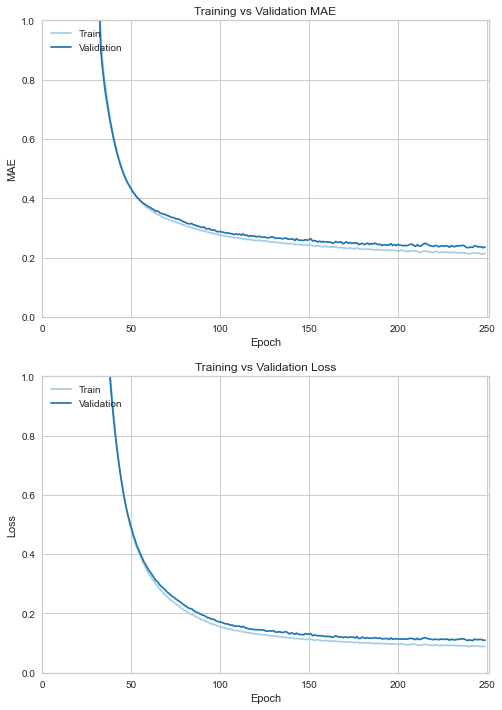

In [135]:
# Plot loss on train and test set
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.ylim([0, 1])
    plt.xlim([0, 251])
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim([0, 1])
    plt.xlim([0, 251])
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

plot_hist(history.history, xsize=8, ysize=12)

From the plot we can see that model was trained during less than 200 epochs and stopped due to early stopping parameter. Validation metric was not increasing, so there is no overfitting problem.

In [136]:
# Check results in absolute values 
predicted_keras = create_dataframe_with_predictions(model=model, X_test=X_test)

DataFrame with price predictions is created.

Statistics for '%error' column:


count    2157.000000
mean        0.072587
std         0.098405
min         0.000029
25%         0.024455
50%         0.054582
75%         0.098445
max         3.509132
Name: %error, dtype: float64

There are 1.81% of predictions  with error > 25%.

Results of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001EA0B464A60> model: 
 - explained_variance: 0.9503,
 - mean_absolute_error: 1599.3195, 
 - root_mean_squared_error: 2557.9952, 
 - mean_squared_log_error: 0.010439.


Results of deep learning model are worse than for CatBoostRegressor (even with using only 8 features).
Possibly adjusting model architecture can help to improve the performance, but it was decided to use CatBoostRegressor solution for this project.

## Step 9. Implement BMW used cars predictor using CatBoostRegressor algorithm <a name="6.9"></a>

In this section we will define a function which predicts car price and will test it on some real world examples from the web site https://www.autotrader.co.uk.

In [137]:
# Define function to predict cars prices
def predict_car_price (model: object, year: int, transmission: object, mileage, fuelType: object, tax: int, mpg: float, 
                       engineSize: float, prediction_model=cat_reg_selected_31):
    
    car = pd.DataFrame({'model': [model], 'year': int(year), 'transmission': [transmission], 'mileage': int(mileage), 
                        'fuelType': [fuelType], 'tax': int(tax), 'mpg': float(mpg), 'engineSize': float(engineSize)})
    # Add features
    create_engine_category (data=car)
    create_model_group_and_series (data=car)
    create__big_engine_auto_semi_auto (data=car)
    create__not_old_car (data=car)
    create_mpg_1_and_mpg_2 (data=car)
    # Scale and encode fetures, combine preprocces features 
    car_num = scaler.transform(car.select_dtypes(exclude='object'))
    cart_cat = encoder.transform(car.select_dtypes(include='object'))
    car_processed = np.concatenate((car_num, cart_cat.toarray()), axis=1)
    predcition = prediction_model.predict(car_processed)
    return car, predcition

In [138]:
# Prepare input data
cars = [{'model': '2 Series',  'year': 2017,  'transmission':  'Automatic',  'mileage': 31000, 'fuelType': 'Diesel', 'tax': 155, 
         'mpg': 48.7, 'engineSize': 2}, 
        {'model': 'X3',  'year': 2016,  'transmission':  'Automatic',  'mileage': 40500, 'fuelType': 'Diesel',  'tax': 155, 
         'mpg': 49.6, 'engineSize': 2}, 
        {'model': 'M4',  'year': 2017,  'transmission':  'Automatic',  'mileage': 45884, 'fuelType': 'Diesel',  'tax': 155, 
         'mpg': 46.3, 'engineSize': 2}, 
        {'model': '3 Series',  'year': 2016,  'transmission':  'Manual',  'mileage': 41351, 'fuelType': 'Petrol',  'tax': 130, 
         'mpg': 45.6, 'engineSize': 1.5}]

real_samples = pd.DataFrame.from_dict({'https://www.autotrader.co.uk/car-details/202104281944760': [17000],
              'https://www.autotrader.co.uk/car-details/202104281946523': [18990],
              'https://www.autotrader.co.uk/car-details/202104291960876': [21000],
              'https://www.autotrader.co.uk/car-details/202104291961070': [11500]}, orient='index', columns=['real_price'])

In [139]:
#Make a prediction of prices with tuned version of CatBoostRegressor and with first version of CatBoostRegressor trained with transformed target (MAE for this model was smaller)
real_samples['prediction_tuned_version'] = np.arange(0, 4)
for num, i in enumerate(cars):
    _, value = predict_car_price(**i)
    real_samples.iloc[num, 1] = np.round(value)

real_samples['prediction_with_transformered_price'] = np.arange(0, 4)
for num, i in enumerate(cars):
    _, value = predict_car_price(**i, prediction_model = cat_reg)
    value = inv_boxcox(value, box_cox_tranform_coef)
    real_samples.iloc[num, 2] = np.round(value)

In [140]:
display(real_samples)

real_price  \
https://www.autotrader.co.uk/car-details/202104...       17000   
https://www.autotrader.co.uk/car-details/202104...       18990   
https://www.autotrader.co.uk/car-details/202104...       21000   
https://www.autotrader.co.uk/car-details/202104...       11500   

                                                    prediction_tuned_version  \
https://www.autotrader.co.uk/car-details/202104...                   16595.0   
https://www.autotrader.co.uk/car-details/202104...                   15085.0   
https://www.autotrader.co.uk/car-details/202104...                   17299.0   
https://www.autotrader.co.uk/car-details/202104...                   15475.0   

                                                    prediction_with_transformered_price  
https://www.autotrader.co.uk/car-details/202104...                              16759.0  
https://www.autotrader.co.uk/car-details/202104...                              18960.0  
https://www.autotrader.co.uk/car-details/202104...                              19035.0  
https://www.autotrader.co.uk/car-details/202104...                              13158.0

In [141]:
# Calculate  metrics for tuned_version
calculate_metrics(y_pred=real_samples.prediction_tuned_version, model=cat_reg_selected_31, y=real_samples.real_price)

Results of <catboost.core.CatBoostRegressor object at 0x000001EA1D3F44F0> model: 
 - explained_variance: 0.1857,
 - mean_absolute_error: 2996.5, 
 - root_mean_squared_error: 3350.7863, 
 - mean_squared_log_error: 0.04482.


In [142]:
# Calculate  metrics for version without transformation 
calculate_metrics(y_pred=real_samples.prediction_with_transformered_price, model=cat_reg, y=real_samples.real_price)

Results of <catboost.core.CatBoostRegressor object at 0x000001EA1D40AFA0> model: 
 - explained_variance: 0.8687,
 - mean_absolute_error: 973.5, 
 - root_mean_squared_error: 1291.2368, 
 - mean_squared_log_error: 0.006998.


From the results we can see that the version of CatBoostRegressor model that was trained with transformed target has much more accurate predictions on the selected samples. From previous tests we know that this version of model had smaller MAE, but higher RMSE on test set in comparison to results received without any transformation of price, but difference in MAE was not significant (about 16 pounds), so it was decided to proceed with the second version of model as RMSE metric for it improved. However, results received on this sample shows that necessity of transformation of target variable should be explored in more depth. 

The sample for this test is not large enough to make any conclusions, but in order to choose the best model – performance of the two versions should be tested on the real data in order to make a conclusion which model should be applied. In case the model with transformation has better results on the unseen data - it's possible to try to improve it by performing hyper-parameter tuning and features reduction steps.

# 7. Conclusion and Recommendations <a name="7"></a>

The aim of this project was to explore what factors affect used cars price the most and to implement a prototype of used BMW cars price predictor which can assist the potential buyers and sellers to define a fair price of a car with minimal time efforts.

### Exploration of what factors affect a price of used BMW cars

The results on the test set show that only 8 parameters are able to explain almost 96% of variance in price:
-	Year when car was produced (importance_score – 30.8);
-	Number in model name (importance_score – 17);
-	Mileage (importance_score – 16.7);
-	Mileage per gallon parameter (importance_score – 12);
-	Added feature `_big_engine_auto_semi_auto` which is a boolean parameter which is True when a car has automatic or semi-automatic transmission and engine size above 2.9 liters (importance_score – 7.9);
-	Boolean parameter which is True when a car belongs to `X` model line (importance_score – 7.9);
-	Size of engine in liters (importance_score – 4.4);
-	Added feature `mpg_2` which is filled if ` fuelType` is ` Diesel` (importance_score – 3.4).

In other words we can conclude that all the features except `tax`, that were in the initial dataset proved are important for price prediction: `year`, `model`, `mileage`, `mpg`, `transmission`, `engineSize` and `fuelType`. 

### Prototype of price predictor for used BMW cars 

In this project several machine learning algorithms were tested and different data preprocessing approaches were explored. New features were extracted from the initial data. Data was spit into training (80%) and testing (20%) set.

The best results were received by the predictive model based on CatBoostRegressor algorithm.

It’s recommended to further explore two versions of this model:
1.	First version was trained with applying BoxCox transformation on target variable `price` (to achieve normal distribution of price variable). The results on the test set were:
    - explained_variance: 0.9611, 
    - mean_absolute_error: 1448.8614, 
    - root_mean_squared_error: 2262.3362, 
    - mean_squared_log_error: 0.00859.
2. The second version was trained without applying any transformation on the target variable, RMSE and R2 metrics for this version were lower, so it was decided to proceed with this version of a model. After hyperparameter tuning and features reduction, the results on the test set for this version were:
    - explained_variance: 0.9637, 
    - mean_absolute_error: 1465.2803, 
    - root_mean_squared_error: 2185.7003, 
    - mean_squared_log_error: 0.00864.

To check the model performance on the real data, 4 inputs of samples from [autotrader.co.uk](https://www.autotrader.co.uk) web-site were manually added and price were predicted for them. The results showed that the very first version of CatBoostRegressor model performed better than tuned version of model trained without price transformation for target. 

For the first version we got MAE of £973.5 and RMSE of £1291, which is even lower error rate than from results on the test set. 

The sample size for this test is not large enough to make any conclusions, but in case of further development and appliance of this predictive model – further investigation of these two versions and their results on the real unseen data is recommended to be done. In case performance of the first version of the model with transformation is proven to be better - it's recommended to explore if results can be improved by performing hyperparameter tuning and features reduction steps.
 
**Limitations of the price prediction model:**
1.	The best results that were achieved on the test set are: mean absolute error of £1465  and mean squared error of £2185. There are about 21% of predictions that have error above 10% and almost 9% of predictions have error above 15%. It’s important to define what are minimal requirements for the model performance, because the current model's predictions might not be reliable enough.
2.	There are outliers in target variable price that are not explained by the parameters that we have in the dataset.
3.	CatBoostRegressor algorithm provided the best results on the test set, but is more computationally expensive than other simpler algorithms with slightly bigger loss. Amount of data to be processed and the expected execution time should be taken into consideration when applying price prediction model.
4.	Cars sales data quickly gets irrelevant with time: demand on the market changes, new models are released and with each time period cars loose in value because their age increases, etc. The price predictor should be updated regularly to provide relevant predictions.

**Possible ways to improve performance of the model:**

1.	Explore in greater depth hyperparameter tuning for CatBoostRegressor. However it is not very likely that much of improvement can be achieved by performing this.
2.	In the dataset some values of real price does not make sense judging from the parameters known about a car. It’s possible that more information about cars can be retrieved that can explain unclear variance in price, for example: 
    -	assessment of car condition, 
    -	more information about important car characteristics (engine model, color, if navigation is installed, leather/textile interior, if car is convertible, number of doors, etc),
    -	information about additional packages/additions installed in a car or assessment of value of additions/packages,
    -	location, 
    -	if a car was in accident and what was a severity of damage, etc. 
3. Collect more data (for example in the dataset there is not much data for the older cars).
4. Explore model performance on the real unseen data and tune it in accordance to received results.

# 8. References <a name="8"></a>


- (1) [Car depreciation](https://www.theaa.com/car-buying/depreciation)
- (2) [DataCamp GitHub repository for careerhub data](https://github.com/datacamp/careerhub-data/tree/master/BMW%20Used%20Car%20Sales)
- (3) [The Society of Motor Manufacturers and Traders.Used car sales: Q1 2020](https://www.smmt.co.uk/2020/05/used-car-sales-q1-2020/)
- (4) [The Society of Motor Manufacturers and Traders.Used car sales: Q2 2020](https://www.smmt.co.uk/2020/08/used-car-sales-q2-2020/)
- (5) [The Society of Motor Manufacturers and Traders.Used car sales: Q3 2020](https://www.smmt.co.uk/2020/11/used-car-sales-q3-2020/)
- (6) [The Society of Motor Manufacturers and Traders.Used car sales: Q4 2020](https://www.smmt.co.uk/2021/02/used-car-sales-q4-2020/)
- (7) [Monthly BMW car market share in the United Kingdom (UK) from January 2015 to December 2020](https://www.statista.com/statistics/300446/bmw-car-market-share-in-the-united-kingdom/)
- (8) [Monthly sales volume of BMW passenger cars in the United Kingdom (UK) from January 2019 to December 2020](https://www.statista.com/statistics/300405/bmw-car-sales-in-the-united-kingdom/)
- (9) [The Ultimate List of UK Car Stats 2020](https://www.carmoney.co.uk/blog/the-ultimate-list-of-uk-car-stats)
- (10) [Linear regression assumptions](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45)
- (11) [BMW 3-Series running costs and mpg](https://www.parkers.co.uk/bmw/3-series/review/mpg-running-costs/)
- (12) [Calculation of MPG for Hybrid Electric Vehicles](https://www.epa.gov/fueleconomy/plug-hybrid-electric-vehicle-learn-more-about-new-label)
- (13) [Honest John. Detailed reviews of new and used cars. Real MPG of BMW M6 model](https://www.honestjohn.co.uk/realmpg/bmw/m6-2012)
- (14) [Wikipedia. BMW i3 model](https://en.wikipedia.org/wiki/BMW_i3)
- (15) [Understanding BMW naming conventions](https://cartelligent.com/blog/understanding-bmw-naming-conventions)
- (16) [Deep Dive into Catboost Functionalities for Model Interpretation](https://towardsdatascience.com/deep-dive-into-catboost-functionalities-for-model-interpretation-7cdef669aeed)
    